In [1]:
import os
import hl7apy
from hl7apy.core import Group, Segment, Field
from hl7apy import parser

import pandas as pd
import matplotlib.pyplot as plt


# Lecture des fichiers

In [2]:
# Fonction de lecture de fichiers .txt
def read_hl7_files_recursive(directory):
    hl7_messages = {}

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.txt') and 'hl7' in file.lower():
                file_path = os.path.join(root, file)
                with open(file_path, 'r') as f:
                    hl7 = f.read().strip()
                    # Tentative d'analyse du message HL7
                    try:
                        message = parser.parse_message(hl7.replace('\n', '\r'), find_groups=True, validation_level=2)
                    except UnsupportedVersion:
                        print('Unsupported version')
                        message = parser.parse_message(hl7.replace('\n', '\r'), find_groups=True, validation_level=2)
                        
                hl7_messages[file] = message

    return hl7_messages

In [3]:
# Appel de la fonction de lecture des fichiers
repertoire = r'C:\Users\AdminPC\sepsis_prediction\sepsis_prediction\data\Resultat test 2406\Resultat test 2406'
dict_messages = read_hl7_files_recursive(repertoire)

In [4]:
# Affichage des fichiers contenant des messages hl7 et leur type
print('Noms et types des fihciers .txt se trouvant dans le repertoire passé et ses sous repertoires :')
for file_name, hl7_message in dict_messages.items():
    print(f"Message from file: {file_name}")
    print(hl7_message)
print('nombre de fichier dans le répertoire : ',len( dict_messages))

Noms et types des fihciers .txt se trouvant dans le repertoire passé et ses sous repertoires :
Message from file: MX800 HL7 waveform.txt
<Message ORU_R01>
Message from file: MX800 HL7.txt
<Message ORU_R01>
Message from file: V500 HL7.txt
<Message ORU_R01>
Message from file: V60 OPptiflow HL7.txt
<Message ORU_R01>
Message from file: V60 ST HL7.txt
<Message ORU_R01>
Message from file: Test1 hl7.txt
<Message ORU_R01>
nombre de fichier dans le répertoire :  6


In [5]:
# Affichage du contenu brute
print('Affichage brute du contenu des fichiers :')
for name_file, file in dict_messages.items():
    print(f'\nFichier {name_file} :')
    display(file.value)

Affichage brute du contenu des fichiers :

Fichier MX800 HL7 waveform.txt :


'MSH|^~\\&|DATACAPTOR||||20240624161556.936+0200||ORU^R01|46241615569503d1|P|2.3||||||8859/1\rPID\rPV1||I|LIT2\rOBR|||||||20240624161556.913+0200|||LIT2|||LIT2\rOBX|1|NA|113||2250^2303^2352^2393^2425^2447^2460^2463^2458^2445^2425^2399^2368^2331^2290^2246^2201^2155^2109^2064^2020^1979^1943^1911^1883^1860^1842^1829^1820^1814^1811^1811^1812^1812^1812^1812^1811^1809^1805^1799^1791^1781^1770^1757^1743^1727^1710^1692^1673^1655^1637^1618^1598^1578^1558^1539^1523^1511^1506^1511^1531^1567^1620^1689^1773^1868^1970^2075^2178^2274^2360^2433^2493^2538^2567^2584^2588^2581^2567^2545^2516^2482^2444^2402^2357^2311^2264^2217^2173^2131^2092^2057^2028^2004^1985^1971|139|||||F||8.0036|20240624161556.913+0200\rOBX|2|NA|5141||0.305^0.405^0.515^0.63^0.75^0.865^0.97^1.055^1.115^1.145^1.13^1.075^0.975^0.85^0.7^0.54^0.375^0.21^0.065^-0.065^-0.165^-0.24^-0.285^-0.31^-0.32^-0.32^-0.315^-0.305^-0.29^-0.275^-0.26^-0.245^-0.235^-0.22^-0.21^-0.2^-0.19^-0.18^-0.175^-0.17^-0.165^-0.16^-0.155^-0.15^-0.145^-0.14^-0.135^-0


Fichier MX800 HL7.txt :


'MSH|^~\\&|DATACAPTOR||||20240624160650.691+0200||ORU^R01|4624160650703131|P|2.3||||||8859/1\rPID\rPV1||I|LIT1\rOBR|||||||20240624160650.674+0200|||LIT1|||LIT1\rOBX|1|ST|1364||NORMAL|139|||||F|||20240624160650.674+0200\rOBX|2|ST|2975||NORMAL|139|||||F|||20240624160650.674+0200\rOBX|3|ST|2978||NORMAL|139|||||F|||20240624160650.674+0200\rOBX|4|ST|4377||NORMAL|139|||||F|||20240624160650.674+0200\rOBX|5|ST|4378||NORMAL|139|||||F|||20240624160650.674+0200\rOBX|6|ST|5973||NORMAL|139|||||F|||20240624160650.674+0200\rOBX|7|ST|5975||NORMAL|139|||||F|||20240624160650.674+0200\rOBX|8|ST|6289||NORMAL|139|||||F|||20240624160650.674+0200\rOBX|9|ST|6290||NORMAL|139|||||F|||20240624160650.674+0200\rOBX|10|ST|6291||NORMAL|139|||||F|||20240624160650.674+0200\rOBX|11|ST|6292||NORMAL|139|||||F|||20240624160650.674+0200\rOBX|12|ST|6293||NORMAL|139|||||F|||20240624160650.674+0200\rOBX|13|ST|6294||NORMAL|139|||||F|||20240624160650.674+0200\rOBX|14|ST|6296||NORMAL|139|||||F|||20240624160650.674+0200\rOBX|15|S


Fichier V500 HL7.txt :


'MSH|^~\\&|DATACAPTOR||||20240624162116.287+0200||ORU^R01|46241621162991c1|P|2.3||||||8859/1\rPID\rPV1||I|LIT2\rOBR|||||||20240624162116.285+0200|||LIT2|||LIT2\rOBX|1|NM|3326||12.3|32|||||F|||20240624162116.285+0200\rOBX|2|NM|9476||11|19|||||F|||20240624162116.285+0200\rOBX|3|NM|60||488|26|||||F|||20240624162116.285+0200\rOBX|4|NM|61||43.3|105|||||F|||20240624162116.285+0200\rOBX|5|NM|582||10.2|106|||||F|||20240624162116.285+0200\rOBX|6|NM|635||40|19|||||F|||20240624162116.285+0200\rOBX|7|NM|775||1|139|||||F|||20240624162116.285+0200\rOBX|8|NM|776||1.5|139|||||F|||20240624162116.285+0200\rOBX|9|NM|1189||7.5|44|||||F|||20240624162116.285+0200\rOBX|10|ST|1190||1:1.5|139|||||F|||20240624162116.285+0200\rOBX|11|NM|1306||488|26|||||F|||20240624162116.285+0200\rOBX|12|NM|1307||10.2|32|||||F|||20240624162116.285+0200\rOBX|13|NM|1314||0|1|||||F|||20240624162116.285+0200\rOBX|14|NM|1415||14|44|||||F|||20240624162116.285+0200\rOBX|15|NM|1426||16|44|||||F|||20240624162116.285+0200\rOBX|16|NM|1569


Fichier V60 OPptiflow HL7.txt :


'MSH|^~\\&|DATACAPTOR||||20240624160645.695+0200||ORU^R01|46241606456950e1|P|2.3||||||8859/1\rPID\rPV1||I|LIT1\rOBR|||||||20240624160645.666+0200|||LIT1|||LIT1\rOBX|1|ST|1364||NORMAL|139|||||F|||20240624160645.666+0200\rOBX|2|ST|2975||NORMAL|139|||||F|||20240624160645.666+0200\rOBX|3|ST|2978||NORMAL|139|||||F|||20240624160645.666+0200\rOBX|4|ST|4377||NORMAL|139|||||F|||20240624160645.666+0200\rOBX|5|ST|4378||NORMAL|139|||||F|||20240624160645.666+0200\rOBX|6|ST|5973||NORMAL|139|||||F|||20240624160645.666+0200\rOBX|7|ST|5975||NORMAL|139|||||F|||20240624160645.666+0200\rOBX|8|ST|6289||NORMAL|139|||||F|||20240624160645.666+0200\rOBX|9|ST|6290||NORMAL|139|||||F|||20240624160645.666+0200\rOBX|10|ST|6291||NORMAL|139|||||F|||20240624160645.666+0200\rOBX|11|ST|6292||NORMAL|139|||||F|||20240624160645.666+0200\rOBX|12|ST|6293||NORMAL|139|||||F|||20240624160645.666+0200\rOBX|13|ST|6294||NORMAL|139|||||F|||20240624160645.666+0200\rOBX|14|ST|6296||NORMAL|139|||||F|||20240624160645.666+0200\rOBX|15|S


Fichier V60 ST HL7.txt :


'MSH|^~\\&|DATACAPTOR||||20240624160326.720+0200||ORU^R01|4624160326731471|P|2.3||||||8859/1\rPID\rPV1||I|LIT1\rOBR|||||||20240624160326.708+0200|||LIT1|||LIT1\rOBX|1|ST|1364||RESET|139|||||F|||20240624160326.708+0200\rOBX|2|ST|2975||NORMAL|139|||||F|||20240624160326.708+0200\rOBX|3|ST|2978||NORMAL|139|||||F|||20240624160326.708+0200\rOBX|4|ST|4377||NORMAL|139|||||F|||20240624160326.708+0200\rOBX|5|ST|4378||NORMAL|139|||||F|||20240624160326.708+0200\rOBX|6|ST|5973||NORMAL|139|||||F|||20240624160326.708+0200\rOBX|7|ST|5975||NORMAL|139|||||F|||20240624160326.708+0200\rOBX|8|ST|6289||NORMAL|139|||||F|||20240624160326.708+0200\rOBX|9|ST|6290||NORMAL|139|||||F|||20240624160326.708+0200\rOBX|10|ST|6291||NORMAL|139|||||F|||20240624160326.708+0200\rOBX|11|ST|6292||NORMAL|139|||||F|||20240624160326.708+0200\rOBX|12|ST|6293||NORMAL|139|||||F|||20240624160326.708+0200\rOBX|13|ST|6294||NORMAL|139|||||F|||20240624160326.708+0200\rOBX|14|ST|6296||RESET|139|||||F|||20240624160326.708+0200\rOBX|15|ST|


Fichier Test1 hl7.txt :


'MSH|^~\\&|DATACAPTOR||||20240624140336||ORU^R01|4624140336704011|P|2.3||||||8859/1\rPID\rPV1||I|LIT9\rOBR|||||||20240624140336|||{0FD5279A-1C6F-4AA1-9846-D88E784B24BA}^IntelliVue MX800|||LIT9\rOBX|1|NA|113||2288^2242^2197^2155^2116^2082^2054^2032^2017^2010^2008^2009^2013^2018^2021^2021^2016^2006^1992^1973^1949^1921^1890^1856^1821^1785^1747^1709^1672^1635^1600^1566|139|||||F||8.0036|20240624140336\rOBX|2|NA|5141||-0.105^-0.105^-0.1^-0.1^-0.1^-0.1^-0.1^-0.1^-0.1^-0.1^-0.1^-0.1^-0.1^-0.105^-0.105^-0.11^-0.11^-0.11^-0.11^-0.11^-0.105^-0.095^-0.075^-0.045^-0.01^0.045^0.11^0.185^0.28^0.38^0.495^0.61^0.72^0.805^0.875^0.915^0.93^0.925^0.895^0.845^0.775^0.685^0.59^0.5^0.415^0.34^0.275^0.22^0.165^0.125^0.09^0.06^0.035^0.02^0.005^-0.01^-0.02^-0.035^-0.045^-0.055^-0.06^-0.07^-0.075^-0.08^-0.085^-0.09^-0.095^-0.095^-0.1^-0.1^-0.1^-0.1^-0.1^-0.1^-0.1^-0.1^-0.095^-0.095^-0.09^-0.09^-0.085^-0.085^-0.08^-0.08^-0.075^-0.075^-0.075^-0.07^-0.07^-0.065^-0.065^-0.065^-0.06^-0.06^-0.055^-0.055^-0.05^-0.05^-

# Fonction d'affichage formaté (Structuré)

In [6]:
# Fonction d'affichages

# Indentations pour l'affichage
indent = "    "
indent_seg = "    "
indent_fld = "        "

def subgroup(group, indent):
    indent = indent + "    "
    print(indent, group)
    for group_segment in group.children:
        if isinstance(group_segment, Group):
            subgroup(group_segment, indent)
        else:
            print(indent_seg, indent, group_segment)
            for attribute in group_segment.children:
                print(indent_fld, indent, attribute, attribute.value)

def showmsg(msg):
    for segment in msg.children:
        if isinstance(segment, Segment):
            print(indent, segment)
            for attribute in segment.children:
                print(indent_fld, indent, attribute, attribute.value)
        elif isinstance(segment, Group):
            print(indent, segment)
            for group_segment in segment.children:
                if isinstance(group_segment, Group):
                    subgroup(group_segment, indent)
                else:
                    print(indent_seg, indent, group_segment)
                    for attribute in group_segment.children:
                        print(indent_fld, indent, attribute, attribute.value)

In [7]:
# Affichage du contenu des messages
for file_name, hl7_message in dict_messages.items():
    print('\n########################################')
    print('file name : ', file_name)
    print('########################################\n')
    showmsg(hl7_message)


########################################
file name :  MX800 HL7 waveform.txt
########################################

     <Segment MSH>
              <Field MSH_1 (FIELD_SEPARATOR) of type ST> |
              <Field MSH_2 (ENCODING_CHARACTERS) of type ST> ^~\&
              <Field MSH_3 (SENDING_APPLICATION) of type HD> DATACAPTOR
              <Field MSH_7 (DATE_TIME_OF_MESSAGE) of type TS> 20240624161556.936+0200
              <Field MSH_9 (MESSAGE_TYPE) of type CM_MSG> ORU^R01
              <Field MSH_10 (MESSAGE_CONTROL_ID) of type ST> 46241615569503d1
              <Field MSH_11 (PROCESSING_ID) of type PT> P
              <Field MSH_12 (VERSION_ID) of type ID> 2.3
              <Field MSH_18 (CHARACTER_SET) of type ID> 8859/1
     <Group ORU_R01_RESPONSE>
         <Group ORU_R01_PATIENT>
              <Segment PID>
             <Group ORU_R01_VISIT>
                  <Segment PV1>
                      <Field PV1_2 (PATIENT_CLASS) of type ID> I
                      <Field PV1_

              <Field MSH_18 (CHARACTER_SET) of type ID> 8859/1
     <Group ORU_R01_RESPONSE>
         <Group ORU_R01_PATIENT>
              <Segment PID>
             <Group ORU_R01_VISIT>
                  <Segment PV1>
                      <Field PV1_2 (PATIENT_CLASS) of type ID> I
                      <Field PV1_3 (ASSIGNED_PATIENT_LOCATION) of type PL> LIT10
         <Group ORU_R01_ORDER_OBSERVATION>
              <Segment OBR>
                  <Field OBR_7 (OBSERVATION_DATE_TIME) of type TS> 20240624140336
                  <Field OBR_10 (COLLECTOR_IDENTIFIER) of type XCN> {844B0A74-E279-4FA0-9034-347E4B4AA47C}^IntelliVue MX800
                  <Field OBR_13 (RELEVANT_CLINICAL_INFORMATION) of type ST> LIT10
             <Group ORU_R01_OBSERVATION>
                  <Segment OBX>
                      <Field OBX_1 (SET_ID_OBX) of type SI> 1
                      <Field OBX_2 (VALUE_TYPE) of type ID> NA
                      <Field OBX_3 (OBSERVATION_IDENTIFIER) of type CE> 113


              <Field MSH_3 (SENDING_APPLICATION) of type HD> DATACAPTOR
              <Field MSH_7 (DATE_TIME_OF_MESSAGE) of type TS> 20240624140337
              <Field MSH_9 (MESSAGE_TYPE) of type CM_MSG> ORU^R01
              <Field MSH_10 (MESSAGE_CONTROL_ID) of type ST> 46241403371490e1
              <Field MSH_11 (PROCESSING_ID) of type PT> P
              <Field MSH_12 (VERSION_ID) of type ID> 2.3
              <Field MSH_18 (CHARACTER_SET) of type ID> 8859/1
     <Group ORU_R01_RESPONSE>
         <Group ORU_R01_PATIENT>
              <Segment PID>
             <Group ORU_R01_VISIT>
                  <Segment PV1>
                      <Field PV1_2 (PATIENT_CLASS) of type ID> I
                      <Field PV1_3 (ASSIGNED_PATIENT_LOCATION) of type PL> LIT2
         <Group ORU_R01_ORDER_OBSERVATION>
              <Segment OBR>
                  <Field OBR_7 (OBSERVATION_DATE_TIME) of type TS> 20240624140337
                  <Field OBR_10 (COLLECTOR_IDENTIFIER) of type XCN> {3D1D

                      <Field OBX_5 (OBSERVATION_VALUE) of type varies> 0.015^0.02^0.02^0.025^0.03^0.03^0.035^0.04^0.04^0.045^0.05^0.05^0.055^0.06^0.065^0.065^0.07^0.075^0.08^0.08^0.085^0.09^0.09^0.095^0.1^0.1^0.105^0.11^0.115^0.115^0.12^0.125^0.13^0.135^0.135^0.14^0.145^0.145^0.145^0.145^0.15^0.15^0.15^0.15^0.15^0.15^0.15^0.15^0.15^0.145^0.145^0.14^0.135^0.13^0.125^0.12^0.115^0.11^0.105^0.1^0.09^0.085^0.08^0.07^0.06^0.055^0.045^0.04^0.03^0.02^0.015^0.005^-0^-0.01^-0.015^-0.025^-0.03^-0.035^-0.04^-0.045^-0.05^-0.05^-0.055^-0.055^-0.06^-0.06^-0.065^-0.065^-0.07^-0.075^-0.075^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.085^-0.085^-0.085^-0.085^-0.085^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.075^-0.075^-0.075^-0.075^-0.075^-0.075^-0.075^-0.075^-0.075^-0.075^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.

                      <Field OBX_3 (OBSERVATION_IDENTIFIER) of type CE> 113
                      <Field OBX_5 (OBSERVATION_VALUE) of type varies> 2019^2001^1981^1959^1936^1912^1889^1870^1857^1855^1865^1889^1929^1983^2047^2118^2191^2263^2330^2389^2440^2480^2510^2531^2544^2548^2544^2533^2517^2496^2470^2440^2407^2372^2334^2295^2256^2216^2178^2143^2112^2084^2060^2040^2024^2013^2006^2000^1996^1993^1990^1984^1975^1965^1952^1936^1919^1903^1891^1885^1887^1898^1918^1948^1987^2032^2078^2124^2167^2205^2236^2260^2277^2286^2287^2283^2273^2257^2236^2210^2181^2150^2115^2079^2044^2010^1978^1949^1925^1905^1889^1877^1868^1862^1858^1855
                      <Field OBX_6 (UNITS) of type CE> 139
                      <Field OBX_11 (OBSERV_RESULT_STATUS) of type ID> F
                      <Field OBX_13 (USER_DEFINED_ACCESS_CHECKS) of type ST> 8.0036
                      <Field OBX_14 (DATE_TIME_OF_THE_OBSERVATION) of type TS> 20240624140338
             <Group ORU_R01_OBSERVATION>
                  <Seg

                      <Field OBX_5 (OBSERVATION_VALUE) of type varies> -0.053016^-0.042222^-0.031429^-0.019683^-0.007302^0.006032^0.019365^0.032063^0.044127^0.055556^0.066984^0.077778^0.088571^0.099048^0.109524^0.122222
                      <Field OBX_6 (UNITS) of type CE> 84
                      <Field OBX_11 (OBSERV_RESULT_STATUS) of type ID> F
                      <Field OBX_13 (USER_DEFINED_ACCESS_CHECKS) of type ST> 16.0072
                      <Field OBX_14 (DATE_TIME_OF_THE_OBSERVATION) of type TS> 20240624140338
     <Segment MSH>
              <Field MSH_1 (FIELD_SEPARATOR) of type ST> |
              <Field MSH_2 (ENCODING_CHARACTERS) of type ST> ^~\&
              <Field MSH_3 (SENDING_APPLICATION) of type HD> DATACAPTOR
              <Field MSH_7 (DATE_TIME_OF_MESSAGE) of type TS> 20240624140339
              <Field MSH_9 (MESSAGE_TYPE) of type CM_MSG> ORU^R01
              <Field MSH_10 (MESSAGE_CONTROL_ID) of type ST> 46241403391032e1
              <Field MSH_11 (PROC

                      <Field PV1_2 (PATIENT_CLASS) of type ID> I
                      <Field PV1_3 (ASSIGNED_PATIENT_LOCATION) of type PL> LIT10
         <Group ORU_R01_ORDER_OBSERVATION>
              <Segment OBR>
                  <Field OBR_7 (OBSERVATION_DATE_TIME) of type TS> 20240624140339
                  <Field OBR_10 (COLLECTOR_IDENTIFIER) of type XCN> {844B0A74-E279-4FA0-9034-347E4B4AA47C}^IntelliVue MX800
                  <Field OBR_13 (RELEVANT_CLINICAL_INFORMATION) of type ST> LIT10
             <Group ORU_R01_OBSERVATION>
                  <Segment OBX>
                      <Field OBX_1 (SET_ID_OBX) of type SI> 1
                      <Field OBX_2 (VALUE_TYPE) of type ID> NA
                      <Field OBX_3 (OBSERVATION_IDENTIFIER) of type CE> 113
                      <Field OBX_5 (OBSERVATION_VALUE) of type varies> 2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^

                      <Field OBX_5 (OBSERVATION_VALUE) of type varies> -0.085^-0.085^-0.085^-0.08^-0.08^-0.08^-0.08^-0.075^-0.075^-0.075^-0.075^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.075^-0.075^-0.07^-0.07^-0.065^-0.065^-0.06^-0.06^-0.055^-0.05^-0.05^-0.045^-0.045^-0.045^-0.04^-0.04^-0.04^-0.04^-0.045^-0.045^-0.045^-0.045^-0.045^-0.05^-0.05^-0.045^-0.045^-0.045^-0.045^-0.045^-0.045^-0.045^-0.045^-0.045^-0.04^-0.04^-0.04^-0.035^-0.035^-0.03^-0.025^-0.025^-0.02^-0.02^-0.02^-0.02^-0.02^-0.02^-0.025^-0.025^-0.03^-0.035^-0.035^-0.04^-0.04^-0.045^-0.045^-0.05^-0.05^-0.055^-0.055^-0.055^-0.06^-0.06^-0.065^-0.065^-0.065^-0.065^-0.06^-0.06^-0.055^-0.055^-0.05^-0.05^-0.05^-0.045^-0.045^-0.045^-0.045^-0.045^-0.045^-0.045^-0.045^-0.04^-0.04^-0.04^-0.04^-0.045^-0.045^-0.045^-0.05^-0.05^-0.05^-0.05^-0.05^-0.045^-0.045^-0.045^-0.045^-0.045^-0.045^-0.045^-0.045^-0.045^-0.045
                      <Field OBX_6 (UNITS) of type CE> 47
                      <Field OBX_1

                  <Field OBR_10 (COLLECTOR_IDENTIFIER) of type XCN> {0C07EB76-2860-4D8F-A1A0-71E53AAC481F}^IntelliVue MX800
                  <Field OBR_13 (RELEVANT_CLINICAL_INFORMATION) of type ST> LIT17
             <Group ORU_R01_OBSERVATION>
                  <Segment OBX>
                      <Field OBX_1 (SET_ID_OBX) of type SI> 1
                      <Field OBX_2 (VALUE_TYPE) of type ID> NA
                      <Field OBX_3 (OBSERVATION_IDENTIFIER) of type CE> 113
                      <Field OBX_5 (OBSERVATION_VALUE) of type varies> 1122^1115^1108^1101^1095^1088^1080^1073^1069^1071^1084^1112^1162^1239^1346^1480^1637^1810^1988^2163^2327^2473^2598^2699^2777^2834^2871^2891^2895^2885^2864^2832
                      <Field OBX_6 (UNITS) of type CE> 139
                      <Field OBX_11 (OBSERV_RESULT_STATUS) of type ID> F
                      <Field OBX_13 (USER_DEFINED_ACCESS_CHECKS) of type ST> 8.0036
                      <Field OBX_14 (DATE_TIME_OF_THE_OBSERVATION) of typ

                      <Field OBX_5 (OBSERVATION_VALUE) of type varies> 0.085^0.075^0.075^0.055^0.035^0.025^0.005^0.005^-0.005^-0.015^-0.015^-0.015^-0.015^-0.005^-0.005^-0.005^-0.005^-0.015^-0.025^-0.045^-0.045^-0.055^-0.085^-0.095^-0.115^-0.125^-0.135^-0.135^-0.135^-0.135^-0.135^-0.125^-0.125^-0.125^-0.125^-0.125^-0.125^-0.125^-0.115^-0.115^-0.105^-0.105^-0.085^-0.055^-0.005^0.045^0.115^0.205^0.315^0.435^0.545^0.645^0.735^0.785^0.835^0.845^0.835^0.805^0.745^0.665^0.575^0.495^0.405^0.325^0.255^0.185^0.115^0.055^0.005^-0.025^-0.065^-0.095^-0.115^-0.115^-0.135^-0.145^-0.135^-0.135^-0.125^-0.135^-0.125^-0.115^-0.105^-0.075^-0.055^-0.045^-0.035^-0.025^-0.025^-0.015^-0.035^-0.045^-0.075^-0.105^-0.135^-0.155^-0.175^-0.185^-0.195^-0.195^-0.195^-0.195^-0.185^-0.175^-0.165^-0.155^-0.135^-0.125^-0.115^-0.095^-0.075^-0.065^-0.065^-0.055^-0.055^-0.045^-0.045^-0.045^-0.045^-0.055^-0.055^-0.075^-0.075^-0.075^-0.075^-0.065^-0.065^-0.055^-0.045^-0.045^-0.045^-0.045^-0.045^-0.065^-0.075^-0.085^-0.095^-0

                      <Field OBX_5 (OBSERVATION_VALUE) of type varies> 2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048
                      <Field OBX_6 (UNITS) of type CE> 139
                      <Field OBX_11 (OBSERV_RESULT_STATUS) of type ID> F
                      <Field OBX_13 (USER_DEFINED_ACCESS_CHECKS) of type ST> 8.0036
                      <Field OBX_14 (DATE_TIME_OF_THE_OBSERVATION) of type TS> 20240624140342
             <Group ORU_R01_OBSERVATION>
                  <Segment OBX>
                      <Field OBX_1 (SET_ID_OBX) of type SI> 2
    

                      <Field OBX_3 (OBSERVATION_IDENTIFIER) of type CE> 5141
                      <Field OBX_5 (OBSERVATION_VALUE) of type varies> -0.23^-0.225^-0.225^-0.225^-0.225^-0.22^-0.215^-0.21^-0.21^-0.21^-0.21^-0.21^-0.205^-0.2^-0.2^-0.2^-0.2^-0.2^-0.2^-0.195^-0.195^-0.19^-0.185^-0.18^-0.17^-0.16^-0.15^-0.14^-0.13^-0.12^-0.115^-0.11^-0.105^-0.105^-0.1^-0.095^-0.095^-0.09^-0.085^-0.08^-0.07^-0.065^-0.06^-0.05^-0.04^-0.035^-0.025^-0.015^-0^0.01^0.02^0.035^0.045^0.055^0.065^0.08^0.095^0.11^0.13^0.145^0.16^0.17^0.18^0.19^0.2^0.205^0.21^0.205^0.205^0.2^0.195^0.195^0.19^0.19^0.185^0.18^0.17^0.16^0.15^0.14^0.13^0.115^0.095^0.075^0.06^0.04^0.02^-0^-0.02^-0.04^-0.055^-0.075^-0.085^-0.095^-0.105^-0.11^-0.12^-0.12^-0.125^-0.135^-0.14^-0.14^-0.15^-0.155^-0.16^-0.165^-0.165^-0.165^-0.165^-0.165^-0.165^-0.165^-0.165^-0.165^-0.165^-0.165^-0.165^-0.165^-0.165^-0.165^-0.16^-0.16^-0.16^-0.16^-0.155^-0.15^-0.145^-0.145^-0.15^-0.15^-0.15^-0.15^-0.145^-0.145^-0.145^-0.145^-0.145^-0.145^-0.14^-0.14

                  <Field OBR_13 (RELEVANT_CLINICAL_INFORMATION) of type ST> LIT2
             <Group ORU_R01_OBSERVATION>
                  <Segment OBX>
                      <Field OBX_1 (SET_ID_OBX) of type SI> 1
                      <Field OBX_2 (VALUE_TYPE) of type ID> NA
                      <Field OBX_3 (OBSERVATION_IDENTIFIER) of type CE> 113
                      <Field OBX_5 (OBSERVATION_VALUE) of type varies> 1796^1775^1755^1736^1721^1715^1720^1738^1771^1820^1882^1955^2035^2117^2198^2273^2341^2401^2451^2490^2518^2537^2548^2550^2547^2539^2525^2506^2481^2452^2419^2385^2351^2317^2284^2254^2228^2205^2186^2172^2163^2157^2153^2152^2152^2153^2154^2152^2149^2145^2138^2128^2118^2111^2109^2113^2126^2150^2186^2233^2290^2352^2417^2483
                      <Field OBX_6 (UNITS) of type CE> 139
                      <Field OBX_11 (OBSERV_RESULT_STATUS) of type ID> F
                      <Field OBX_13 (USER_DEFINED_ACCESS_CHECKS) of type ST> 8.0036
                      <Field OBX_14 (D

                      <Field OBX_5 (OBSERVATION_VALUE) of type varies> -0^-0.005^-0.01^-0.015^-0.025^-0.03^-0.035^-0.04^-0.045^-0.05^-0.055^-0.06^-0.065^-0.07^-0.07^-0.075^-0.075^-0.08^-0.08^-0.085^-0.085^-0.085^-0.09^-0.09^-0.09^-0.095^-0.095^-0.095^-0.1^-0.1^-0.1^-0.105^-0.105^-0.105^-0.105^-0.11^-0.11^-0.11^-0.115^-0.115^-0.115^-0.12^-0.12^-0.12^-0.12^-0.12^-0.125^-0.125^-0.125^-0.13^-0.13^-0.13^-0.135^-0.135^-0.13^-0.13^-0.13^-0.13^-0.135^-0.145^-0.155^-0.165^-0.18^-0.2^-0.22^-0.24^-0.255^-0.27^-0.28^-0.29^-0.295^-0.3^-0.3^-0.3^-0.3^-0.305^-0.31^-0.32^-0.325^-0.335^-0.335^-0.33^-0.325^-0.31^-0.29^-0.27^-0.24^-0.21^-0.18^-0.15^-0.125^-0.105^-0.09^-0.075^-0.06^-0.05^-0.04^-0.035^-0.03^-0.025^-0.02^-0.015^-0.015^-0.01^-0.01^-0.01^-0.005^-0.005^-0.005^-0.005^-0^-0^-0^-0^-0^-0^-0^-0^-0^-0^-0^0.005^0.005^0.005^-0^-0^-0^-0^-0.005^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.005^-0.005^-0.005^-0.01^-0.01^-0.01^-0.015^-0.02^-0.02^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.02^-0.02^

                      <Field OBX_5 (OBSERVATION_VALUE) of type varies> -0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025
                      <Field OBX_

                      <Field OBX_6 (UNITS) of type CE> 139
                      <Field OBX_11 (OBSERV_RESULT_STATUS) of type ID> F
                      <Field OBX_13 (USER_DEFINED_ACCESS_CHECKS) of type ST> 8.0036
                      <Field OBX_14 (DATE_TIME_OF_THE_OBSERVATION) of type TS> 20240624140345
             <Group ORU_R01_OBSERVATION>
                  <Segment OBX>
                      <Field OBX_1 (SET_ID_OBX) of type SI> 2
                      <Field OBX_2 (VALUE_TYPE) of type ID> NA
                      <Field OBX_3 (OBSERVATION_IDENTIFIER) of type CE> 5141
                      <Field OBX_5 (OBSERVATION_VALUE) of type varies> 0.015^0.015^0.015^0.015^0.015^0.01^0.01^0.01^0.01^0.01^0.005^0.01^0.01^0.01^0.01^0.01^0.01^0.01^0.01^0.01^0.01^0.01^0.01^0.005^0.01^0.01^0.005^0.01^0.01^0.01^0.015^0.015^0.015^0.015^0.015^0.015^0.015^0.01^0.01^0.005^0.005^0.005^0.005^0.005^0.005^0.005^0.005^0.005^0.01^0.01^0.015^0.015^0.015^0.015^0.015^0.015^0.015^0.015^0.015^0.015^0.015^0.01

                      <Field OBX_6 (UNITS) of type CE> 47
                      <Field OBX_11 (OBSERV_RESULT_STATUS) of type ID> F
                      <Field OBX_13 (USER_DEFINED_ACCESS_CHECKS) of type ST> 2.0009
                      <Field OBX_14 (DATE_TIME_OF_THE_OBSERVATION) of type TS> 20240624140345
             <Group ORU_R01_OBSERVATION>
                  <Segment OBX>
                      <Field OBX_1 (SET_ID_OBX) of type SI> 4
                      <Field OBX_2 (VALUE_TYPE) of type ID> NA
                      <Field OBX_3 (OBSERVATION_IDENTIFIER) of type CE> 8857
                      <Field OBX_5 (OBSERVATION_VALUE) of type varies> 108.4375^107.3125^106.375^105.5625^104.875^104.25^103.6875^103.1875^102.8125^102.875^103.5625^104.75^105.875^106.5625^106.8125^106.75^106.375^105.625^104.4375^103.0625^101.5625^100^98.5625^97.25^96.0625^94.875^93.6875^92.5625^91.375^90.375^89.5^88.75^88.0625^87.3125^86.5625^85.9375^85.3125^84.75^84.0625^83.375^82.6875^82^81.3125^80.625^79.8125

                      <Field OBX_5 (OBSERVATION_VALUE) of type varies> -0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^1.3^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.015^-0.005^0.015^0.025^0.045^0.075^0.095^0.125^0.155^0.205^0.225^0.265^0.295^0.325^0.365^0.395^0.425^0.465^0.495^0.525^0.545^0.555^0.555^0.555^0.545^0.535^0.515^0.475^0.445^0.425^0.375^0.345^0.315^0.265^0.235^0.205^0.155^0.125^0.095^0.065^0.035^0.005^-0.005^-0.035^-0.045^-0.055^-0.065^-0.075^-0.075^-0.075^-0.075^-0.075^-0.075^-0.075^-0.065^-0.065^-0.065^-0.065^-0.065^-0.065^-0.065

                  <Field OBR_7 (OBSERVATION_DATE_TIME) of type TS> 20240624140346
                  <Field OBR_10 (COLLECTOR_IDENTIFIER) of type XCN> {41967234-14DC-43FC-8BDD-5AD2E4C41037}^IntelliVue MX800
                  <Field OBR_13 (RELEVANT_CLINICAL_INFORMATION) of type ST> LIT4
             <Group ORU_R01_OBSERVATION>
                  <Segment OBX>
                      <Field OBX_1 (SET_ID_OBX) of type SI> 1
                      <Field OBX_2 (VALUE_TYPE) of type ID> NA
                      <Field OBX_3 (OBSERVATION_IDENTIFIER) of type CE> 113
                      <Field OBX_5 (OBSERVATION_VALUE) of type varies> 1842^1816^1789^1762^1734^1706^1679^1653^1626^1598^1571^1545^1519^1494^1469^1446^1426^1412^1406^1413^1438^1481^1546^1631^1734^1849^1971^2094^2213^2327^2433^2529
                      <Field OBX_6 (UNITS) of type CE> 139
                      <Field OBX_11 (OBSERV_RESULT_STATUS) of type ID> F
                      <Field OBX_13 (USER_DEFINED_ACCESS_CHECKS) of type ST>

                      <Field OBX_5 (OBSERVATION_VALUE) of type varies> -0.22^-0.225^-0.225^-0.225^-0.225^-0.225^-0.22^-0.215^-0.21^-0.205^-0.195^-0.19^-0.185^-0.175^-0.17^-0.165^-0.155^-0.15^-0.145^-0.135^-0.13^-0.125^-0.115^-0.11^-0.105^-0.095^-0.09^-0.085^-0.08^-0.075^-0.07^-0.06^-0.055^-0.05^-0.045^-0.04^-0.035^-0.03^-0.025^-0.025^-0.02^-0.02^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-

                      <Field OBX_13 (USER_DEFINED_ACCESS_CHECKS) of type ST> 2.0009
                      <Field OBX_14 (DATE_TIME_OF_THE_OBSERVATION) of type TS> 20240624140348
             <Group ORU_R01_OBSERVATION>
                  <Segment OBX>
                      <Field OBX_1 (SET_ID_OBX) of type SI> 4
                      <Field OBX_2 (VALUE_TYPE) of type ID> NA
                      <Field OBX_3 (OBSERVATION_IDENTIFIER) of type CE> 8870
                      <Field OBX_5 (OBSERVATION_VALUE) of type varies> -0.204762^-0.21619^-0.225079^-0.230159^-0.231429^-0.227619^-0.219048^-0.206667^-0.190794^-0.173016^-0.153968^-0.134921^-0.11619^-0.097778^-0.079683^-0.062222^-0.045397^-0.029841^-0.015238^-0.000635^0.013968^0.028571^0.043175^0.056825^0.069206^0.080317^0.088889^0.092698^0.091429^0.084762^0.073968^0.063175^0.052698^0.044444^0.038413^0.035873^0.03619^0.03619^0.035873^0.033651^0.029841^0.026984^0.024762^0.023175^0.021587^0.018413^0.013651^0.006984
                      <Field

                      <Field OBX_1 (SET_ID_OBX) of type SI> 5
                      <Field OBX_2 (VALUE_TYPE) of type ID> NA
                      <Field OBX_3 (OBSERVATION_IDENTIFIER) of type CE> 8870
                      <Field OBX_5 (OBSERVATION_VALUE) of type varies> -0.6^-0.6^-0.6^-0.6^-0.6^-0.6^-0.6^-0.6^-0.6^-0.6^-0.6^-0.6^-0.6^-0.6^-0.6^-0.6
                      <Field OBX_6 (UNITS) of type CE> 84
                      <Field OBX_11 (OBSERV_RESULT_STATUS) of type ID> F
                      <Field OBX_13 (USER_DEFINED_ACCESS_CHECKS) of type ST> 16.0072
                      <Field OBX_14 (DATE_TIME_OF_THE_OBSERVATION) of type TS> 20240624140348
     <Segment MSH>
              <Field MSH_1 (FIELD_SEPARATOR) of type ST> |
              <Field MSH_2 (ENCODING_CHARACTERS) of type ST> ^~\&
              <Field MSH_3 (SENDING_APPLICATION) of type HD> DATACAPTOR
              <Field MSH_7 (DATE_TIME_OF_MESSAGE) of type TS> 20240624140348
              <Field MSH_9 (MESSAGE_TYPE) of

                      <Field OBX_5 (OBSERVATION_VALUE) of type varies> -0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^2.02^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.01^-0^0.01^0.03^0.05^0.075^0.11^0.145^0.185^0.23^0.28^0.325^0.375^0.42^0.465^0.515^0.56^0.605^0.655^0.695^0.735^0.765^0.785^0.795^0.795^0.785^0.77^0.74^0.7^0.655^0.61^0.555^0.505^0.455^0.4^0.35^0.3^0.245^0.195^0.145^0.1^0.06^0.02^-0.01^-0.04^-0.06^-0.08^-0.09^-0.1^-0.105^-0.105^-0.105^-0.105^-0.105^-0.105^-0.1^-0.1^-0.1^-0.1^-0.1^-0.1^-0.1^-0.1^-0.1^-0.095^-0.095^-0.095^-0.095^-0.095^-0.095^-0.095^-0.09^-0.09^-0.09^-0.09^-0.09^-0.09^-0.09^-0.09^-0.085^-0.085^-0.085^-0.085^-0.085^-0.085^-0.085^-0.085^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.08^-0.075^-0.075^-0.075^-0.075^-0.075^-0.075^-0.075^-0.075^-0.075^-0.075^

                      <Field OBX_5 (OBSERVATION_VALUE) of type varies> -0.195^-0.185^-0.185^-0.175^-0.175^-0.165^-0.165^-0.155^-0.145^-0.135^-0.125^-0.125^-0.115^-0.115^-0.105^-0.105^-0.095^-0.095^-0.085^-0.075^-0.065^-0.075^-0.065^-0.055^-0.055^-0.045^-0.035^-0.035^-0.025^-0.025^-0.025^-0.025^-0.015^-0.015^-0.005^-0.005^-0.005^0.005^-0.005^0.005^0.005^0.005^0.005^0.005^0.005^0.005^0.005^0.005^0.005^-0.005^0.005^0.005^-0.005^-0.005^0.005^0.005^-0.005^-0.005^-0.005^-0.005^-0.005^-0.005^-0.005^-0.005^-0.005^-0.005^-0.005^-0.005^-0.005^-0.005^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.015^-0.005^-0.005^-0.005^-0.005^-0.005^-0.005^-0.005^-0.005^-0.005^0.005^0.005^0.005^0.005^0.005^0.005^0.005^0.005^0.005^-0.005^-0.005^-0.005^0.005^0.005^0.005^0.005^0.005^0.005^0.005^0.005^0.005^0.005^0.005^0.015^0.015^0.015^0.015^0.

                      <Field OBX_5 (OBSERVATION_VALUE) of type varies> 2937^2968^2982^2982^2969^2945^2911^2868^2816^2757^2693^2624^2550^2472^2392^2311^2230^2149^2070^1994^1923^1858^1797^1742^1694^1652^1615^1584^1557^1535^1515^1497^1482^1468^1455^1444^1433^1422^1411^1401^1390^1378^1366^1355^1345^1335^1325^1315^1305^1295^1285^1275^1265^1255^1246^1236^1226^1217^1209^1201^1193^1186^1179^1172
                      <Field OBX_6 (UNITS) of type CE> 139
                      <Field OBX_11 (OBSERV_RESULT_STATUS) of type ID> F
                      <Field OBX_13 (USER_DEFINED_ACCESS_CHECKS) of type ST> 8.0036
                      <Field OBX_14 (DATE_TIME_OF_THE_OBSERVATION) of type TS> 20240624140350
             <Group ORU_R01_OBSERVATION>
                  <Segment OBX>
                      <Field OBX_1 (SET_ID_OBX) of type SI> 2
                      <Field OBX_2 (VALUE_TYPE) of type ID> NA
                      <Field OBX_3 (OBSERVATION_IDENTIFIER) of type CE> 5141
                      <F

                      <Field PV1_2 (PATIENT_CLASS) of type ID> I
                      <Field PV1_3 (ASSIGNED_PATIENT_LOCATION) of type PL> LIT4
         <Group ORU_R01_ORDER_OBSERVATION>
              <Segment OBR>
                  <Field OBR_7 (OBSERVATION_DATE_TIME) of type TS> 20240624140351
                  <Field OBR_10 (COLLECTOR_IDENTIFIER) of type XCN> {41967234-14DC-43FC-8BDD-5AD2E4C41037}^IntelliVue MX800
                  <Field OBR_13 (RELEVANT_CLINICAL_INFORMATION) of type ST> LIT4
             <Group ORU_R01_OBSERVATION>
                  <Segment OBX>
                      <Field OBX_1 (SET_ID_OBX) of type SI> 1
                      <Field OBX_2 (VALUE_TYPE) of type ID> NA
                      <Field OBX_3 (OBSERVATION_IDENTIFIER) of type CE> 113
                      <Field OBX_5 (OBSERVATION_VALUE) of type varies> 2590^2533^2482^2436^2395^2357^2320^2284^2251^2222^2194^2166^2138^2111^2085^2058^2030^2001^1971^1940^1907^1873^1838^1802^1766^1730^1694^1659^1626^1593^15

# Conversion des données en format DataFrame Python

In [8]:
import pandas as pd
import re
from collections import defaultdict


# Fonction de transformation de la structure hl7 en format dataframe pandas
def hl7_to_dataframe(msg):
    # Initialize a list to store data
    data = []
    headers = set()
    
    
    # Function to process groups of segments
    def process_group(group, row_data, group_prefix=""):
        for group_segment in group.children:
            if isinstance(group_segment, Group):
                process_group(group_segment, row_data, group_prefix)
            else:
                process_segment(group_segment, row_data, group_prefix)

    # Function to process segments
    def process_segment(segment, row_data, segment_prefix=""):
        for attribute in segment.children:
            if attribute.name:  # Check if attribute has a name
                # Use regex to find the field name in parentheses
                match = re.search(r'\(([^)]+)\)', str(attribute))
                field_name = match.group(1) if match else attribute.name
                header_name = f"{segment_prefix}{segment.name}_{field_name}"
                headers.add(header_name)
                # Handle multiple occurrences by using a list
                if header_name not in row_data:
                    row_data[header_name] = []
                row_data[header_name].append(attribute.value)
       
   # Function to flatten lists in the dictionary
    def flatten_row_data(row_data):
        flattened_data = {}
        for key, values in row_data.items():
            if isinstance(values, list):
                # Join multiple values with a delimiter (e.g., "|")
                flattened_data[key] = "|".join(values)
            else:
                flattened_data[key] = values
        return flattened_data
    
    
    # Function to display message
    def hl7_to_list(msg):
        row_data = defaultdict(list)  # Initialize row data with default list
        current_row_data = None
        
        for segment in msg.children:
            if segment.name == "MSH":
                if current_row_data is not None:
                    data.append(flatten_row_data(current_row_data))
                current_row_data = defaultdict(list)  # Start a new row for each MSH
                process_segment(segment, current_row_data)
            elif isinstance(segment, Segment):
                if current_row_data is not None:
                    process_segment(segment, current_row_data)
            elif isinstance(segment, Group):
                if current_row_data is not None:
                    process_group(segment, current_row_data)
        
        if current_row_data is not None:
            data.append(flatten_row_data(current_row_data))

    # Call the function showmsg to process the HL7 message
    hl7_to_list(msg)

    # Convert list of dictionaries to DataFrame and fill missing columns
    df = pd.DataFrame(data)
    for header in headers:
        if header not in df.columns:
            df[header] = None
            
            
    return df

In [9]:
for file_name, hl7_message in dict_messages.items():
    print(f"Message from file: {file_name}")
    df = hl7_to_dataframe(hl7_message)

    # Définir les options d'affichage de pandas pour limiter le nombre de lignes et de colonnes affichées
    pd.set_option('display.max_rows', 10)  # Limite le nombre de lignes affichées à 10
    pd.set_option('display.max_columns', 10)  # Limite le nombre de colonnes affichées à 10

    display(df)



Message from file: MX800 HL7 waveform.txt


MSH_FIELD_SEPARATOR MSH_ENCODING_CHARACTERS MSH_SENDING_APPLICATION  \
0                   |                    ^~\&              DATACAPTOR   

  MSH_DATE_TIME_OF_MESSAGE MSH_MESSAGE_TYPE  ...  \
0  20240624161556.936+0200          ORU^R01  ...   

                               OBX_OBSERVATION_VALUE       OBX_UNITS  \
0  2250^2303^2352^2393^2425^2447^2460^2463^2458^2...  139|47|47|9|84   

  OBX_OBSERV_RESULT_STATUS       OBX_USER_DEFINED_ACCESS_CHECKS  \
0                F|F|F|F|F  8.0036|2.0009|2.0009|8.0036|16.0072   

                    OBX_DATE_TIME_OF_THE_OBSERVATION  
0  20240624161556.913+0200|20240624161556.913+020...  

[1 rows x 22 columns]

Message from file: MX800 HL7.txt


MSH_FIELD_SEPARATOR MSH_ENCODING_CHARACTERS MSH_SENDING_APPLICATION  \
0                   |                    ^~\&              DATACAPTOR   

  MSH_DATE_TIME_OF_MESSAGE MSH_MESSAGE_TYPE  ...  \
0  20240624160650.691+0200          ORU^R01  ...   

                               OBX_OBSERVATION_VALUE  \
0  NORMAL|NORMAL|NORMAL|NORMAL|NORMAL|NORMAL|NORM...   

                                           OBX_UNITS  \
0  139|139|139|139|139|139|139|139|139|139|139|13...   

                            OBX_OBSERV_RESULT_STATUS  \
0  F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|...   

                    OBX_DATE_TIME_OF_THE_OBSERVATION  \
0  20240624160650.674+0200|20240624160650.674+020...   

  OBX_USER_DEFINED_ACCESS_CHECKS  
0                SETTING|SETTING  

[1 rows x 22 columns]

Message from file: V500 HL7.txt


MSH_FIELD_SEPARATOR MSH_ENCODING_CHARACTERS MSH_SENDING_APPLICATION  \
0                   |                    ^~\&              DATACAPTOR   

  MSH_DATE_TIME_OF_MESSAGE MSH_MESSAGE_TYPE  ...  \
0  20240624162116.287+0200          ORU^R01  ...   

                          OBX_OBSERVATION_IDENTIFIER  \
0  3326|9476|60|61|582|635|775|776|1189|1190|1306...   

                               OBX_OBSERVATION_VALUE  \
0  12.3|11|488|43.3|10.2|40|1|1.5|7.5|1:1.5|488|1...   

                                           OBX_UNITS  \
0  32|19|26|105|106|19|139|139|44|139|26|32|1|44|...   

                            OBX_OBSERV_RESULT_STATUS  \
0  F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|...   

                    OBX_DATE_TIME_OF_THE_OBSERVATION  
0  20240624162116.285+0200|20240624162116.285+020...  

[1 rows x 21 columns]

Message from file: V60 OPptiflow HL7.txt


MSH_FIELD_SEPARATOR MSH_ENCODING_CHARACTERS MSH_SENDING_APPLICATION  \
0                   |                    ^~\&              DATACAPTOR   

  MSH_DATE_TIME_OF_MESSAGE MSH_MESSAGE_TYPE  ...  \
0  20240624160645.695+0200          ORU^R01  ...   

                               OBX_OBSERVATION_VALUE  \
0  NORMAL|NORMAL|NORMAL|NORMAL|NORMAL|NORMAL|NORM...   

                                           OBX_UNITS  \
0  139|139|139|139|139|139|139|139|139|139|139|13...   

                            OBX_OBSERV_RESULT_STATUS  \
0  F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|...   

                    OBX_DATE_TIME_OF_THE_OBSERVATION  \
0  20240624160645.666+0200|20240624160645.666+020...   

  OBX_USER_DEFINED_ACCESS_CHECKS  
0                SETTING|SETTING  

[1 rows x 22 columns]

Message from file: V60 ST HL7.txt


MSH_FIELD_SEPARATOR MSH_ENCODING_CHARACTERS MSH_SENDING_APPLICATION  \
0                   |                    ^~\&              DATACAPTOR   

  MSH_DATE_TIME_OF_MESSAGE MSH_MESSAGE_TYPE  ...  \
0  20240624160326.720+0200          ORU^R01  ...   

                               OBX_OBSERVATION_VALUE  \
0  RESET|NORMAL|NORMAL|NORMAL|NORMAL|NORMAL|NORMA...   

                                           OBX_UNITS  \
0  139|139|139|139|139|139|139|139|139|139|139|13...   

                            OBX_OBSERV_RESULT_STATUS  \
0  F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|...   

                    OBX_DATE_TIME_OF_THE_OBSERVATION  \
0  20240624160326.708+0200|20240624160326.708+020...   

                      OBX_USER_DEFINED_ACCESS_CHECKS  
0  SETTING|SETTING|SETTING|SETTING|SETTING|SETTIN...  

[1 rows x 22 columns]

Message from file: Test1 hl7.txt


MSH_FIELD_SEPARATOR MSH_ENCODING_CHARACTERS MSH_SENDING_APPLICATION  \
0                     |                    ^~\&              DATACAPTOR   
1                     |                    ^~\&              DATACAPTOR   
2                     |                    ^~\&              DATACAPTOR   
3                     |                    ^~\&              DATACAPTOR   
4                     |                    ^~\&              DATACAPTOR   
..                  ...                     ...                     ...   
259                   |                    ^~\&              DATACAPTOR   
260                   |                    ^~\&              DATACAPTOR   
261                   |                    ^~\&              DATACAPTOR   
262                   |                    ^~\&              DATACAPTOR   
263                   |                    ^~\&              DATACAPTOR   

    MSH_DATE_TIME_OF_MESSAGE MSH_MESSAGE_TYPE  ...  \
0             20240624140336          ORU^R01  ...   
1             20240624140336          ORU^R01  ...   
2             20240624140336          ORU^R01  ...   
3             20240624140336          ORU^R01  ...   
4             20240624140336          ORU^R01  ...   
..                       ...              ...  ...   
259           20240624140351          ORU^R01  ...   
260           20240624140351          ORU^R01  ...   
261           20240624140351          ORU^R01  ...   
262           20240624140351          ORU^R01  ...   
263           20240624140351          ORU^R01  ...   

                                 OBX_OBSERVATION_VALUE       OBX_UNITS  \
0    2288^2242^2197^2155^2116^2082^2054^2032^2017^2...    139|47|47|84   
1    0.07^0.07^0.075^0.075^0.08^0.085^0.09^0.09^0.0...        47|47|84   
2    2048^2048^2048^2048^2048^2048^2048^2048^2048^2...             139   
3    2048^2048^2048^2048^2048^2048^2048^2048^2048^2...    139|47|47|84   
4    1222^1195^1169^1144^1120^1099^1079^1062^1042^1...    139|47|47|84   
..                                                 ...             ...   
259  1165^1159^1152^1144^1136^1129^1123^1116^1108^1...  139|47|47|9|84   
260  1459^1432^1406^1362^1347^1340^1368^1407^1464^1...    139|47|47|84   
261  1790^1774^1755^1733^1708^1681^1655^1630^1606^1...    139|47|47|84   
262  1366^1345^1327^1310^1293^1278^1263^1249^1236^1...    139|47|47|84   
263  1829^1927^2015^2090^2151^2199^2234^2257^2270^2...  139|47|47|9|84   

    OBX_OBSERV_RESULT_STATUS       OBX_USER_DEFINED_ACCESS_CHECKS  \
0                    F|F|F|F         8.0036|2.0009|2.0009|16.0072   
1                      F|F|F                2.0009|2.0009|16.0072   
2                          F                               8.0036   
3                    F|F|F|F         8.0036|2.0009|2.0009|16.0072   
4                    F|F|F|F         8.0036|2.0009|2.0009|16.0072   
..                       ...                                  ...   
259                F|F|F|F|F  8.0036|2.0009|2.0009|8.0036|16.0072   
260                  F|F|F|F         8.0036|2.0009|2.0009|16.0072   
261                  F|F|F|F         8.0036|2.0009|2.0009|16.0072   
262                  F|F|F|F         8.0036|2.0009|2.0009|16.0072   
263                F|F|F|F|F  8.0036|2.0009|2.0009|8.0036|16.0072   

                      OBX_DATE_TIME_OF_THE_OBSERVATION  
0    20240624140336|20240624140336|20240624140336|2...  
1         20240624140336|20240624140336|20240624140336  
2                                       20240624140336  
3    20240624140336|20240624140336|20240624140336|2...  
4    20240624140336|20240624140336|20240624140336|2...  
..                                                 ...  
259  20240624140351|20240624140351|20240624140351|2...  
260  20240624140351|20240624140351|20240624140351|2...  
261  20240624140351|20240624140351|20240624140351|2...  
262  20240624140351|20240624140351|20240624140351|2...  
263  20240624140351|20240624140351|20240624140351|2...  

[264 rows x 22 columns]

In [36]:
# Création d'un dictionnaire de DFs
dict_dfs = {}
for file_name, hl7_message in dict_messages.items():
    df_name = f'df_{file_name}'.replace(' ', '_').split('.')[0]
    # Exemple d'utilisation avec un des messages HL7 parsés (msg1_1, msg1_2, etc.)
    df = hl7_to_dataframe(hl7_message)
    dict_dfs[df_name] = df
for name_df, df in dict_dfs.items():
    file_path = os.path.join(r"C:\Users\AdminPC\sepsis_prediction\sepsis_prediction\exploration du sujet\variables\recent", f'{name_df}.xlsx')
    
    #Enregistrer le DataFrame dans un fichier Excel
    #df.to_excel(file_path, index=False)
    print(name_df)
    display(df)

df_MX800_HL7_waveform


MSH_FIELD_SEPARATOR MSH_ENCODING_CHARACTERS MSH_SENDING_APPLICATION  \
0                   |                    ^~\&              DATACAPTOR   

  MSH_DATE_TIME_OF_MESSAGE MSH_MESSAGE_TYPE  ...  \
0  20240624161556.936+0200          ORU^R01  ...   

                               OBX_OBSERVATION_VALUE       OBX_UNITS  \
0  2250^2303^2352^2393^2425^2447^2460^2463^2458^2...  139|47|47|9|84   

  OBX_OBSERV_RESULT_STATUS       OBX_USER_DEFINED_ACCESS_CHECKS  \
0                F|F|F|F|F  8.0036|2.0009|2.0009|8.0036|16.0072   

                    OBX_DATE_TIME_OF_THE_OBSERVATION  
0  20240624161556.913+0200|20240624161556.913+020...  

[1 rows x 22 columns]

df_MX800_HL7


MSH_FIELD_SEPARATOR MSH_ENCODING_CHARACTERS MSH_SENDING_APPLICATION  \
0                   |                    ^~\&              DATACAPTOR   

  MSH_DATE_TIME_OF_MESSAGE MSH_MESSAGE_TYPE  ...  \
0  20240624160650.691+0200          ORU^R01  ...   

                               OBX_OBSERVATION_VALUE  \
0  NORMAL|NORMAL|NORMAL|NORMAL|NORMAL|NORMAL|NORM...   

                                           OBX_UNITS  \
0  139|139|139|139|139|139|139|139|139|139|139|13...   

                            OBX_OBSERV_RESULT_STATUS  \
0  F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|...   

                    OBX_DATE_TIME_OF_THE_OBSERVATION  \
0  20240624160650.674+0200|20240624160650.674+020...   

  OBX_USER_DEFINED_ACCESS_CHECKS  
0                SETTING|SETTING  

[1 rows x 22 columns]

df_V500_HL7


MSH_FIELD_SEPARATOR MSH_ENCODING_CHARACTERS MSH_SENDING_APPLICATION  \
0                   |                    ^~\&              DATACAPTOR   

  MSH_DATE_TIME_OF_MESSAGE MSH_MESSAGE_TYPE  ...  \
0  20240624162116.287+0200          ORU^R01  ...   

                          OBX_OBSERVATION_IDENTIFIER  \
0  3326|9476|60|61|582|635|775|776|1189|1190|1306...   

                               OBX_OBSERVATION_VALUE  \
0  12.3|11|488|43.3|10.2|40|1|1.5|7.5|1:1.5|488|1...   

                                           OBX_UNITS  \
0  32|19|26|105|106|19|139|139|44|139|26|32|1|44|...   

                            OBX_OBSERV_RESULT_STATUS  \
0  F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|...   

                    OBX_DATE_TIME_OF_THE_OBSERVATION  
0  20240624162116.285+0200|20240624162116.285+020...  

[1 rows x 21 columns]

df_V60_OPptiflow_HL7


MSH_FIELD_SEPARATOR MSH_ENCODING_CHARACTERS MSH_SENDING_APPLICATION  \
0                   |                    ^~\&              DATACAPTOR   

  MSH_DATE_TIME_OF_MESSAGE MSH_MESSAGE_TYPE  ...  \
0  20240624160645.695+0200          ORU^R01  ...   

                               OBX_OBSERVATION_VALUE  \
0  NORMAL|NORMAL|NORMAL|NORMAL|NORMAL|NORMAL|NORM...   

                                           OBX_UNITS  \
0  139|139|139|139|139|139|139|139|139|139|139|13...   

                            OBX_OBSERV_RESULT_STATUS  \
0  F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|...   

                    OBX_DATE_TIME_OF_THE_OBSERVATION  \
0  20240624160645.666+0200|20240624160645.666+020...   

  OBX_USER_DEFINED_ACCESS_CHECKS  
0                SETTING|SETTING  

[1 rows x 22 columns]

df_V60_ST_HL7


MSH_FIELD_SEPARATOR MSH_ENCODING_CHARACTERS MSH_SENDING_APPLICATION  \
0                   |                    ^~\&              DATACAPTOR   

  MSH_DATE_TIME_OF_MESSAGE MSH_MESSAGE_TYPE  ...  \
0  20240624160326.720+0200          ORU^R01  ...   

                               OBX_OBSERVATION_VALUE  \
0  RESET|NORMAL|NORMAL|NORMAL|NORMAL|NORMAL|NORMA...   

                                           OBX_UNITS  \
0  139|139|139|139|139|139|139|139|139|139|139|13...   

                            OBX_OBSERV_RESULT_STATUS  \
0  F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|F|...   

                    OBX_DATE_TIME_OF_THE_OBSERVATION  \
0  20240624160326.708+0200|20240624160326.708+020...   

                      OBX_USER_DEFINED_ACCESS_CHECKS  
0  SETTING|SETTING|SETTING|SETTING|SETTING|SETTIN...  

[1 rows x 22 columns]

df_Test1_hl7


MSH_FIELD_SEPARATOR MSH_ENCODING_CHARACTERS MSH_SENDING_APPLICATION  \
0                     |                    ^~\&              DATACAPTOR   
1                     |                    ^~\&              DATACAPTOR   
2                     |                    ^~\&              DATACAPTOR   
3                     |                    ^~\&              DATACAPTOR   
4                     |                    ^~\&              DATACAPTOR   
..                  ...                     ...                     ...   
259                   |                    ^~\&              DATACAPTOR   
260                   |                    ^~\&              DATACAPTOR   
261                   |                    ^~\&              DATACAPTOR   
262                   |                    ^~\&              DATACAPTOR   
263                   |                    ^~\&              DATACAPTOR   

    MSH_DATE_TIME_OF_MESSAGE MSH_MESSAGE_TYPE  ...  \
0             20240624140336          ORU^R01  ...   
1             20240624140336          ORU^R01  ...   
2             20240624140336          ORU^R01  ...   
3             20240624140336          ORU^R01  ...   
4             20240624140336          ORU^R01  ...   
..                       ...              ...  ...   
259           20240624140351          ORU^R01  ...   
260           20240624140351          ORU^R01  ...   
261           20240624140351          ORU^R01  ...   
262           20240624140351          ORU^R01  ...   
263           20240624140351          ORU^R01  ...   

                                 OBX_OBSERVATION_VALUE       OBX_UNITS  \
0    2288^2242^2197^2155^2116^2082^2054^2032^2017^2...    139|47|47|84   
1    0.07^0.07^0.075^0.075^0.08^0.085^0.09^0.09^0.0...        47|47|84   
2    2048^2048^2048^2048^2048^2048^2048^2048^2048^2...             139   
3    2048^2048^2048^2048^2048^2048^2048^2048^2048^2...    139|47|47|84   
4    1222^1195^1169^1144^1120^1099^1079^1062^1042^1...    139|47|47|84   
..                                                 ...             ...   
259  1165^1159^1152^1144^1136^1129^1123^1116^1108^1...  139|47|47|9|84   
260  1459^1432^1406^1362^1347^1340^1368^1407^1464^1...    139|47|47|84   
261  1790^1774^1755^1733^1708^1681^1655^1630^1606^1...    139|47|47|84   
262  1366^1345^1327^1310^1293^1278^1263^1249^1236^1...    139|47|47|84   
263  1829^1927^2015^2090^2151^2199^2234^2257^2270^2...  139|47|47|9|84   

    OBX_OBSERV_RESULT_STATUS       OBX_USER_DEFINED_ACCESS_CHECKS  \
0                    F|F|F|F         8.0036|2.0009|2.0009|16.0072   
1                      F|F|F                2.0009|2.0009|16.0072   
2                          F                               8.0036   
3                    F|F|F|F         8.0036|2.0009|2.0009|16.0072   
4                    F|F|F|F         8.0036|2.0009|2.0009|16.0072   
..                       ...                                  ...   
259                F|F|F|F|F  8.0036|2.0009|2.0009|8.0036|16.0072   
260                  F|F|F|F         8.0036|2.0009|2.0009|16.0072   
261                  F|F|F|F         8.0036|2.0009|2.0009|16.0072   
262                  F|F|F|F         8.0036|2.0009|2.0009|16.0072   
263                F|F|F|F|F  8.0036|2.0009|2.0009|8.0036|16.0072   

                      OBX_DATE_TIME_OF_THE_OBSERVATION  
0    20240624140336|20240624140336|20240624140336|2...  
1         20240624140336|20240624140336|20240624140336  
2                                       20240624140336  
3    20240624140336|20240624140336|20240624140336|2...  
4    20240624140336|20240624140336|20240624140336|2...  
..                                                 ...  
259  20240624140351|20240624140351|20240624140351|2...  
260  20240624140351|20240624140351|20240624140351|2...  
261  20240624140351|20240624140351|20240624140351|2...  
262  20240624140351|20240624140351|20240624140351|2...  
263  20240624140351|20240624140351|20240624140351|2...  

[264 rows x 22 columns]

# Exploration des variables

In [37]:
# Traitement des variables dans chaque fichier séparemment 

print('Identifiants des variables uniques dans chaques fichiers :\n')
for name_df, df in dict_dfs.items():
    unique_identifiers = set()
    for item in df['OBX_OBSERVATION_IDENTIFIER']:
        if isinstance(item, str):
            identifiers = item.split('|')
            unique_identifiers.update(identifiers)
    print(name_df)
    print(unique_identifiers)
    print('Nombre de variables : ', len(unique_identifiers))
    print()

Identifiants des variables uniques dans chaques fichiers :

df_MX800_HL7_waveform
{'8870', '8857', '5141', '5142', '113'}
Nombre de variables :  5

df_MX800_HL7
{'172', '171', '2978', '1364', '5973', '6293', '4377', '6307', '4378', '6289', '6290', '4390', '92011', '92001', '26', '6300', '6305', '6277', '6294', '6266', '6299', '5975', '2975', '6291', '6296', '6303', '6376', '6216', '6292'}
Nombre de variables :  29

df_V500_HL7
{'61', '1761', '1571', '2564', '4892', '1415', '2092', '60', '3968', '2326', '635', '2416', '775', '5340', '1570', '1307', '1306', '2432', '776', '9476', '7640', '3326', '1190', '2433', '9466', '582', '3971', '2570', '4003', '2434', '1426', '3966', '1189', '1314', '1569', '7642'}
Nombre de variables :  36

df_V60_OPptiflow_HL7
{'172', '171', '2978', '1364', '5973', '6293', '4377', '6307', '4378', '6289', '6290', '4390', '92011', '92001', '26', '6300', '6305', '6277', '6294', '6266', '6299', '5975', '2975', '6291', '6296', '6303', '6376', '6216', '6292'}
Nombre de

In [58]:
# Affichage de l'ID, label et valeur des variables de chaque fichier

dataframes = dict_dfs
for name_df, df in dataframes.items():
    print(name_df)
    display(df[interest_columns])
    
    print('Nombre de messages : ', df.shape[0])
    print('Nombre d\'ID messages uniques : ', df['MSH_MESSAGE_CONTROL_ID'].nunique())
    
    # Séparer les valeurs des colonnes en listes
    df['OBX_SET_ID_OBX'] = df['OBX_SET_ID_OBX'].str.split('|')
    df['OBX_OBSERVATION_IDENTIFIER'] = df['OBX_OBSERVATION_IDENTIFIER'].str.split('|')
    df['OBX_OBSERVATION_VALUE'] = df['OBX_OBSERVATION_VALUE'].str.split('|')
    df['OBX_UNITS'] = df['OBX_UNITS'].str.split('|')
    
    # Afficher chaque identifiant avec sa valeur correspondante
    for idx, row in df.iterrows():
        id_vars = row['OBX_OBSERVATION_IDENTIFIER']
        values = row['OBX_OBSERVATION_VALUE']
        
        print('Nombre de variables : ', len(id_vars))
        # Associer chaque identifiant à sa valeur correspondante
        for id_var, value in zip(id_vars, values):
            try:
                id_var_int = int(id_var)
                matching_labels = variables_df.loc[variables_df['ID'] == id_var_int]
                if not matching_labels.empty:
                    label_var = matching_labels.iloc[0]['Label']
                    print(f"Id variables: {id_var} ({label_var}) : \n  Value: {value}")
                else:
                    print(f"Id variables: {id_var}, (inconnue) : \n  Value: {value}")
            except ValueError:
                print(f"Id variables: {id_var}, (invalide) : \n  Value: {value}")
            print()

df_MX800 HL7 waveform.txt


MSH_MESSAGE_CONTROL_ID MSH_DATE_TIME_OF_MESSAGE  \
0       46241615569503d1  20240624161556.936+0200   

  PV1_ASSIGNED_PATIENT_LOCATION  \
0                          LIT2   

                    OBX_DATE_TIME_OF_THE_OBSERVATION OBX_SET_ID_OBX  \
0  20240624161556.913+0200|20240624161556.913+020...      1|2|3|4|5   

  OBX_OBSERVATION_IDENTIFIER  \
0    113|5141|5142|8857|8870   

                               OBX_OBSERVATION_VALUE       OBX_UNITS  
0  2250^2303^2352^2393^2425^2447^2460^2463^2458^2...  139|47|47|9|84

Nombre de messages :  1
Nombre d'ID messages uniques :  1
Nombre de variables :  5
Id variables: 113 (Pleth Waveform) : 
  Value: 2250^2303^2352^2393^2425^2447^2460^2463^2458^2445^2425^2399^2368^2331^2290^2246^2201^2155^2109^2064^2020^1979^1943^1911^1883^1860^1842^1829^1820^1814^1811^1811^1812^1812^1812^1812^1811^1809^1805^1799^1791^1781^1770^1757^1743^1727^1710^1692^1673^1655^1637^1618^1598^1578^1558^1539^1523^1511^1506^1511^1531^1567^1620^1689^1773^1868^1970^2075^2178^2274^2360^2433^2493^2538^2567^2584^2588^2581^2567^2545^2516^2482^2444^2402^2357^2311^2264^2217^2173^2131^2092^2057^2028^2004^1985^1971

Id variables: 5141 (ECG Lead II Wave) : 
  Value: 0.305^0.405^0.515^0.63^0.75^0.865^0.97^1.055^1.115^1.145^1.13^1.075^0.975^0.85^0.7^0.54^0.375^0.21^0.065^-0.065^-0.165^-0.24^-0.285^-0.31^-0.32^-0.32^-0.315^-0.305^-0.29^-0.275^-0.26^-0.245^-0.235^-0.22^-0.21^-0.2^-0.19^-0.18^-0.175^-0.17^-0.165^-0.16^-0.155^-0.15^-0.145^-0.14^-0.135^-0.13^-0.125^-0.12^-0.11^-0.105^-0.1^-0.095^-0.09^-0.0

MSH_MESSAGE_CONTROL_ID MSH_DATE_TIME_OF_MESSAGE  \
0       4624160650703131  20240624160650.691+0200   

  PV1_ASSIGNED_PATIENT_LOCATION  \
0                          LIT1   

                    OBX_DATE_TIME_OF_THE_OBSERVATION  \
0  20240624160650.674+0200|20240624160650.674+020...   

                                      OBX_SET_ID_OBX  \
0  1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|1...   

                          OBX_OBSERVATION_IDENTIFIER  \
0  1364|2975|2978|4377|4378|5973|5975|6289|6290|6...   

                               OBX_OBSERVATION_VALUE  \
0  NORMAL|NORMAL|NORMAL|NORMAL|NORMAL|NORMAL|NORM...   

                                           OBX_UNITS  
0  139|139|139|139|139|139|139|139|139|139|139|13...

Nombre de messages :  1
Nombre d'ID messages uniques :  1
Nombre de variables :  29
Id variables: 1364, (inconnue) : 
  Value: NORMAL

Id variables: 2975, (inconnue) : 
  Value: NORMAL

Id variables: 2978, (inconnue) : 
  Value: NORMAL

Id variables: 4377, (inconnue) : 
  Value: NORMAL

Id variables: 4378, (inconnue) : 
  Value: NORMAL

Id variables: 5973, (inconnue) : 
  Value: NORMAL

Id variables: 5975, (inconnue) : 
  Value: NORMAL

Id variables: 6289, (inconnue) : 
  Value: NORMAL

Id variables: 6290, (inconnue) : 
  Value: NORMAL

Id variables: 6291, (inconnue) : 
  Value: NORMAL

Id variables: 6292, (inconnue) : 
  Value: NORMAL

Id variables: 6293, (inconnue) : 
  Value: NORMAL

Id variables: 6294, (inconnue) : 
  Value: NORMAL

Id variables: 6296 (O2 Supply Alarm) : 
  Value: NORMAL

Id variables: 6299, (inconnue) : 
  Value: NORMAL

Id variables: 6300, (inconnue) : 
  Value: NORMAL

Id variables: 6303, (inconnue) : 
  Value: NORMAL

Id variables: 6305, (inconnue) : 
  Value: 

MSH_MESSAGE_CONTROL_ID MSH_DATE_TIME_OF_MESSAGE  \
0       46241621162991c1  20240624162116.287+0200   

  PV1_ASSIGNED_PATIENT_LOCATION  \
0                          LIT2   

                    OBX_DATE_TIME_OF_THE_OBSERVATION  \
0  20240624162116.285+0200|20240624162116.285+020...   

                                      OBX_SET_ID_OBX  \
0  1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|1...   

                          OBX_OBSERVATION_IDENTIFIER  \
0  3326|9476|60|61|582|635|775|776|1189|1190|1306...   

                               OBX_OBSERVATION_VALUE  \
0  12.3|11|488|43.3|10.2|40|1|1.5|7.5|1:1.5|488|1...   

                                           OBX_UNITS  
0  32|19|26|105|106|19|139|139|44|139|26|32|1|44|...

Nombre de messages :  1
Nombre d'ID messages uniques :  1
Nombre de variables :  37
Id variables: 3326 (Device Average Gas Flow) : 
  Value: 12.3

Id variables: 9476 (Percent of Leakage) : 
  Value: 11

Id variables: 60 (Tidal Volume) : 
  Value: 488

Id variables: 61 (Dynamic Compliance) : 
  Value: 43.3

Id variables: 582 (Resistance) : 
  Value: 10.2

Id variables: 635 (Inspired O2 (FiO2)) : 
  Value: 40

Id variables: 775 (Inspiratory Component of I:E Ratio) : 
  Value: 1

Id variables: 776 (Expiratory Component of I:E Ratio) : 
  Value: 1.5

Id variables: 1189 (Positive End Expiratory Pressure (PEEP)) : 
  Value: 7.5

Id variables: 1190 (I:E Ratio) : 
  Value: 1:1.5

Id variables: 1306 (Tidal Volume) : 
  Value: 488

Id variables: 1307 (Minute Volume) : 
  Value: 10.2

Id variables: 1314 (Spontaneous Respiration Rate) : 
  Value: 0

Id variables: 1415 (Mean Airway Pressure) : 
  Value: 14

Id variables: 1426 (Intrinsic PEEP) : 
  Value: 16

Id variables: 1569 (Minimum Airway Press

MSH_MESSAGE_CONTROL_ID MSH_DATE_TIME_OF_MESSAGE  \
0       46241606456950e1  20240624160645.695+0200   

  PV1_ASSIGNED_PATIENT_LOCATION  \
0                          LIT1   

                    OBX_DATE_TIME_OF_THE_OBSERVATION  \
0  20240624160645.666+0200|20240624160645.666+020...   

                                      OBX_SET_ID_OBX  \
0  1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|1...   

                          OBX_OBSERVATION_IDENTIFIER  \
0  1364|2975|2978|4377|4378|5973|5975|6289|6290|6...   

                               OBX_OBSERVATION_VALUE  \
0  NORMAL|NORMAL|NORMAL|NORMAL|NORMAL|NORMAL|NORM...   

                                           OBX_UNITS  
0  139|139|139|139|139|139|139|139|139|139|139|13...

Nombre de messages :  1
Nombre d'ID messages uniques :  1
Nombre de variables :  29
Id variables: 1364, (inconnue) : 
  Value: NORMAL

Id variables: 2975, (inconnue) : 
  Value: NORMAL

Id variables: 2978, (inconnue) : 
  Value: NORMAL

Id variables: 4377, (inconnue) : 
  Value: NORMAL

Id variables: 4378, (inconnue) : 
  Value: NORMAL

Id variables: 5973, (inconnue) : 
  Value: NORMAL

Id variables: 5975, (inconnue) : 
  Value: NORMAL

Id variables: 6289, (inconnue) : 
  Value: NORMAL

Id variables: 6290, (inconnue) : 
  Value: NORMAL

Id variables: 6291, (inconnue) : 
  Value: NORMAL

Id variables: 6292, (inconnue) : 
  Value: NORMAL

Id variables: 6293, (inconnue) : 
  Value: NORMAL

Id variables: 6294, (inconnue) : 
  Value: NORMAL

Id variables: 6296 (O2 Supply Alarm) : 
  Value: NORMAL

Id variables: 6299, (inconnue) : 
  Value: NORMAL

Id variables: 6300, (inconnue) : 
  Value: NORMAL

Id variables: 6303, (inconnue) : 
  Value: NORMAL

Id variables: 6305, (inconnue) : 
  Value: 

MSH_MESSAGE_CONTROL_ID MSH_DATE_TIME_OF_MESSAGE  \
0       4624160326731471  20240624160326.720+0200   

  PV1_ASSIGNED_PATIENT_LOCATION  \
0                          LIT1   

                    OBX_DATE_TIME_OF_THE_OBSERVATION  \
0  20240624160326.708+0200|20240624160326.708+020...   

                                      OBX_SET_ID_OBX  \
0  1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|1...   

                          OBX_OBSERVATION_IDENTIFIER  \
0  1364|2975|2978|4377|4378|5973|5975|6289|6290|6...   

                               OBX_OBSERVATION_VALUE  \
0  RESET|NORMAL|NORMAL|NORMAL|NORMAL|NORMAL|NORMA...   

                                           OBX_UNITS  
0  139|139|139|139|139|139|139|139|139|139|139|13...

Nombre de messages :  1
Nombre d'ID messages uniques :  1
Nombre de variables :  48
Id variables: 1364, (inconnue) : 
  Value: RESET

Id variables: 2975, (inconnue) : 
  Value: NORMAL

Id variables: 2978, (inconnue) : 
  Value: NORMAL

Id variables: 4377, (inconnue) : 
  Value: NORMAL

Id variables: 4378, (inconnue) : 
  Value: NORMAL

Id variables: 5973, (inconnue) : 
  Value: NORMAL

Id variables: 5975, (inconnue) : 
  Value: NORMAL

Id variables: 6289, (inconnue) : 
  Value: NORMAL

Id variables: 6290, (inconnue) : 
  Value: NORMAL

Id variables: 6291, (inconnue) : 
  Value: NORMAL

Id variables: 6292, (inconnue) : 
  Value: NORMAL

Id variables: 6293, (inconnue) : 
  Value: NORMAL

Id variables: 6294, (inconnue) : 
  Value: NORMAL

Id variables: 6296 (O2 Supply Alarm) : 
  Value: RESET

Id variables: 6299, (inconnue) : 
  Value: NORMAL

Id variables: 6300, (inconnue) : 
  Value: NORMAL

Id variables: 6303, (inconnue) : 
  Value: NORMAL

Id variables: 6305, (inconnue) : 
  Value: RE

MSH_MESSAGE_CONTROL_ID MSH_DATE_TIME_OF_MESSAGE  \
0         4624140336704011           20240624140336   
1         4624140336736021           20240624140336   
2         4624140336745031           20240624140336   
3         4624140336784041           20240624140336   
4         4624140336835051           20240624140336   
..                     ...                      ...   
259       46241403513997b3           20240624140351   
260       46241403514077c3           20240624140351   
261       46241403515217d3           20240624140351   
262       46241403515229f1           20240624140351   
263       46241403515517e3           20240624140351   

    PV1_ASSIGNED_PATIENT_LOCATION  \
0                            LIT9   
1                           LIT11   
2                           LIT16   
3                           LIT10   
4                            LIT1   
..                            ...   
259                         LIT17   
260                          LIT4   
261                          LIT3   
262                          LIT9   
263                          LIT2   

                      OBX_DATE_TIME_OF_THE_OBSERVATION OBX_SET_ID_OBX  \
0    20240624140336|20240624140336|20240624140336|2...        1|2|3|4   
1         20240624140336|20240624140336|20240624140336          1|2|3   
2                                       20240624140336              1   
3    20240624140336|20240624140336|20240624140336|2...        1|2|3|4   
4    20240624140336|20240624140336|20240624140336|2...        1|2|3|4   
..                                                 ...            ...   
259  20240624140351|20240624140351|20240624140351|2...      1|2|3|4|5   
260  20240624140351|20240624140351|20240624140351|2...        1|2|3|4   
261  20240624140351|20240624140351|20240624140351|2...        1|2|3|4   
262  20240624140351|20240624140351|20240624140351|2...        1|2|3|4   
263  20240624140351|20240624140351|20240624140351|2...      1|2|3|4|5   

    OBX_OBSERVATION_IDENTIFIER  \
0           113|5141|5142|8870   
1               5141|5142|8870   
2                          113   
3           113|5141|5142|8870   
4           113|5141|5142|8870   
..                         ...   
259    113|5141|5142|8857|8870   
260         113|5141|5142|8870   
261         113|5141|5142|8870   
262         113|5141|5142|8870   
263    113|5141|5142|8857|8870   

                                 OBX_OBSERVATION_VALUE       OBX_UNITS  
0    2288^2242^2197^2155^2116^2082^2054^2032^2017^2...    139|47|47|84  
1    0.07^0.07^0.075^0.075^0.08^0.085^0.09^0.09^0.0...        47|47|84  
2    2048^2048^2048^2048^2048^2048^2048^2048^2048^2...             139  
3    2048^2048^2048^2048^2048^2048^2048^2048^2048^2...    139|47|47|84  
4    1222^1195^1169^1144^1120^1099^1079^1062^1042^1...    139|47|47|84  
..                                                 ...             ...  
259  1165^1159^1152^1144^1136^1129^1123^1116^1108^1...  139|47|47|9|84  
260  1459^1432^1406^1362^1347^1340^1368^1407^1464^1...    139|47|47|84  
261  1790^1774^1755^1733^1708^1681^1655^1630^1606^1...    139|47|47|84  
262  1366^1345^1327^1310^1293^1278^1263^1249^1236^1...    139|47|47|84  
263  1829^1927^2015^2090^2151^2199^2234^2257^2270^2...  139|47|47|9|84  

[264 rows x 8 columns]

Nombre de messages :  264
Nombre d'ID messages uniques :  264
Nombre de variables :  4
Id variables: 113 (Pleth Waveform) : 
  Value: 2288^2242^2197^2155^2116^2082^2054^2032^2017^2010^2008^2009^2013^2018^2021^2021^2016^2006^1992^1973^1949^1921^1890^1856^1821^1785^1747^1709^1672^1635^1600^1566

Id variables: 5141 (ECG Lead II Wave) : 
  Value: -0.105^-0.105^-0.1^-0.1^-0.1^-0.1^-0.1^-0.1^-0.1^-0.1^-0.1^-0.1^-0.1^-0.105^-0.105^-0.11^-0.11^-0.11^-0.11^-0.11^-0.105^-0.095^-0.075^-0.045^-0.01^0.045^0.11^0.185^0.28^0.38^0.495^0.61^0.72^0.805^0.875^0.915^0.93^0.925^0.895^0.845^0.775^0.685^0.59^0.5^0.415^0.34^0.275^0.22^0.165^0.125^0.09^0.06^0.035^0.02^0.005^-0.01^-0.02^-0.035^-0.045^-0.055^-0.06^-0.07^-0.075^-0.08^-0.085^-0.09^-0.095^-0.095^-0.1^-0.1^-0.1^-0.1^-0.1^-0.1^-0.1^-0.1^-0.095^-0.095^-0.09^-0.09^-0.085^-0.085^-0.08^-0.08^-0.075^-0.075^-0.075^-0.07^-0.07^-0.065^-0.065^-0.065^-0.06^-0.06^-0.055^-0.055^-0.05^-0.05^-0.045^-0.04^-0.04^-0.035^-0.035^-0.03^-0.025^-0.025^-0.02^-0.02^-0.02^-0

Id variables: 5141 (ECG Lead II Wave) : 
  Value: -0.205^-0.2^-0.195^-0.185^-0.18^-0.175^-0.165^-0.16^-0.155^-0.145^-0.14^-0.135^-0.13^-0.12^-0.115^-0.11^-0.1^-0.095^-0.09^-0.085^-0.075^-0.07^-0.065^-0.06^-0.05^-0.045^-0.04^-0.035^-0.03^-0.025^-0.02^-0.02^-0.015^-0.015^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01^-0.01

Id variables: 5142 (ECG Lead III Wave) : 
  Value: -0.165^-0.165^-0.165^-0.145^-0.145^-0.145^-0.135^-0.135^-0.135^-0.115^-0.115^-0.115^-0.115^-0.105^-0.095^-0.095^-0

Id variables: 5141 (ECG Lead II Wave) : 
  Value: -0.045^-0.05^-0.055^-0.055^-0.06^-0.065^-0.065^-0.07^-0.07^-0.075^-0.075^-0.075^-0.075^-0.07^-0.07^-0.07^-0.07^-0.07^-0.065^-0.065^-0.065^-0.065^-0.065^-0.065^-0.065^-0.06^-0.06^-0.06^-0.055^-0.05^-0.045^-0.04^-0.035^-0.025^-0.02^-0.01^-0.005^-0^-0^-0^-0^-0^-0.005^-0.015^-0.02^-0.03^-0.035^-0.045^-0.055^-0.065^-0.075^-0.085^-0.095^-0.105^-0.115^-0.12^-0.125^-0.13^-0.135^-0.14^-0.14^-0.145^-0.15^-0.16^-0.165^-0.17^-0.18^-0.19^-0.2^-0.205^-0.21^-0.215^-0.22^-0.22^-0.225^-0.225^-0.225^-0.225^-0.23^-0.23^-0.23^-0.23^-0.23^-0.23^-0.225^-0.225^-0.225^-0.22^-0.22^-0.225^-0.225^-0.23^-0.23^-0.235^-0.24^-0.245^-0.25^-0.25^-0.255^-0.255^-0.255^-0.26^-0.26^-0.26^-0.26^-0.26^-0.265^-0.265^-0.26^-0.26^-0.255^-0.255^-0.255^-0.26^-0.27^-0.275^-0.29^-0.3^-0.32^-0.34^-0.36^-0.38^-0.39^-0.4^-0.41^-0.415^-0.42^-0.425^-0.43^-0.435^-0.44^-0.445^-0.45^-0.46^-0.465^-0.47^-0.47^-0.46^-0.45^-0.435^-0.415^-0.395^-0.375^-0.345^-0.315^-0.285^-0.255^-0.23^-0.21^-0.

Id variables: 5142 (ECG Lead III Wave) : 
  Value: 0.16^0.165^0.165^0.165^0.165^0.17^0.17^0.17^0.17^0.17^0.17^0.17^0.17^0.17^0.17^0.17^0.17^0.17^0.17^0.17^0.17^0.17^0.175^0.175^0.175^0.18^0.18^0.18^0.18^0.185^0.185^0.185^0.19^0.19^0.19^0.19^0.19^0.195^0.195^0.195^0.2^0.2^0.2^0.205^0.205^0.205^0.21^0.21^0.21^0.21^0.21^0.21^0.21^0.21^0.21^0.21^0.21^0.21^0.21^0.21^0.205^0.205^0.205^0.2^0.2^0.2^0.195^0.195^0.19^0.19^0.185^0.185^0.185^0.18^0.18^0.175^0.175^0.17^0.17^0.165^0.16^0.16^0.155^0.15^0.145^0.145^0.14^0.135^0.13^0.13^0.125^0.12^0.115^0.115^0.11^0.105^0.105^0.1^0.095^0.09^0.09^0.085^0.085^0.08^0.075^0.075^0.07^0.065^0.065^0.06^0.055^0.05^0.05^0.045^0.045^0.04^0.04^0.035^0.035^0.035^0.03^0.03^0.03^0.03^0.025^0.025^0.025^0.025

Id variables: 8857 (Arterial Blood Pressure (ABP) Wave) : 
  Value: 49^48.75^48.625^48.5625^48.75^49.5^51.1875^54.4375^59.75^67.375^76.8125^87.0625^96.875^105.5^112.5^118.0625^122.625^126.75^130.75^134.6875^138.375^141.5625^143.6875^144.4375^143.5625^141.0625^13

Id variables: 113 (Pleth Waveform) : 
  Value: 2790^2739^2680^2614^2543^2468^2389^2309^2228^2146^2066^1989^1916^1846^1781^1723^1671^1625^1585^1550^1519^1493^1471^1452^1434^1417^1402^1388^1375^1363^1351^1340^1329^1319^1310^1300^1290^1280^1269^1259^1249^1238^1227^1217^1207^1198^1189^1181^1173^1165^1157^1150^1143^1137^1131^1125^1119^1112^1103^1094^1086^1082^1087^1108

Id variables: 5141 (ECG Lead II Wave) : 
  Value: 0.41^0.42^0.43^0.44^0.45^0.46^0.47^0.49^0.51^0.53^0.555^0.585^0.615^0.65^0.685^0.72^0.76^0.8^0.845^0.89^0.935^0.985^1.03^1.07^1.1^1.115^1.105^1.08^1.025^0.955^0.865^0.755^0.63^0.5^0.365^0.24^0.125^0.02^-0.065^-0.135^-0.195^-0.245^-0.28^-0.305^-0.325^-0.34^-0.35^-0.36^-0.365^-0.37^-0.375^-0.38^-0.385^-0.39^-0.39^-0.395^-0.395^-0.395^-0.395^-0.4^-0.4^-0.4^-0.4^-0.405^-0.405^-0.405^-0.405^-0.405^-0.405^-0.405^-0.405^-0.405^-0.405^-0.405^-0.41^-0.41^-0.41^-0.415^-0.42^-0.42^-0.425^-0.425^-0.43^-0.43^-0.435^-0.44^-0.44^-0.445^-0.445^-0.45^-0.45^-0.45^-0.455^-0.455^-0.46^-0.46^-0.4

Id variables: 113 (Pleth Waveform) : 
  Value: 2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048

Nombre de variables :  4
Id variables: 113 (Pleth Waveform) : 
  Value: 2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048

Id variables: 5141 (ECG Lead II Wave) : 
  Value: -0.23^-0.225^-0.225^-0.225^-0

Id variables: 113 (Pleth Waveform) : 
  Value: 2099^2095^2086^2071^2051^2027^1999^1967^1933^1897^1859^1821^1783^1745^1708^1672^1637^1604^1573^1545^1519^1494^1470^1448^1427^1408^1389^1371^1355^1341^1327^1313

Id variables: 5141 (ECG Lead II Wave) : 
  Value: -0.06^-0.055^-0.055^-0.05^-0.05^-0.045^-0.045^-0.04^-0.04^-0.035^-0.035^-0.035^-0.03^-0.03^-0.025^-0.025^-0.02^-0.02^-0.015^-0.01^-0.01^-0.005^-0^-0^0.005^0.005^0.01^0.01^0.015^0.015^0.02^0.025^0.025^0.03^0.03^0.035^0.04^0.045^0.05^0.055^0.06^0.065^0.07^0.075^0.075^0.08^0.085^0.09^0.095^0.095^0.1^0.1^0.105^0.11^0.11^0.115^0.115^0.12^0.125^0.125^0.13^0.13^0.13^0.135^0.135^0.14^0.14^0.14^0.14^0.135^0.135^0.135^0.13^0.13^0.125^0.12^0.115^0.11^0.105^0.1^0.095^0.09^0.08^0.075^0.065^0.055^0.05^0.04^0.035^0.025^0.02^0.01^0.005^-0.005^-0.01^-0.02^-0.025^-0.035^-0.04^-0.05^-0.055^-0.06^-0.065^-0.07^-0.075^-0.08^-0.08^-0.08^-0.085^-0.085^-0.09^-0.09^-0.09^-0.09^-0.09^-0.095^-0.095^-0.095^-0.095^-0.095^-0.095^-0.095^-0.1^-0.1^-0.1^-0.1^-0.1^-0

Id variables: 8870 (Impedance Respiration Wave) : 
  Value: 1^1^1^1^1^1^1^1^1^1^1^1^1^1^1^1

Nombre de variables :  5
Id variables: 113 (Pleth Waveform) : 
  Value: 1367^1356^1337^1328^1319^1304^1294^1285^1277^1263^1253^1245^1233^1225^1217^1209^1202^1194^1185^1177^1169^1162^1155^1149^1143^1137^1131^1125^1119^1114^1110^1106

Id variables: 5141 (ECG Lead II Wave) : 
  Value: -0^-0^-0^-0^-0^-0^-0^-0^-0^-0^-0^-0^-0^-0^-0^-0^-0^-0^-0^-0^-0^-0^-0^-0^0.005^0.005^0.005^0.005^0.01^0.01^0.015^0.015^0.015^0.015^0.015^0.015^0.015^0.015^0.015^0.015^0.015^0.015^0.02^0.02^0.02^0.025^0.025^0.025^0.025^0.025^0.025^0.025^0.025^0.025^0.025^0.025^0.025^0.025^0.025^0.025^0.025^0.025^0.025^0.025^0.025^0.025^0.025^0.025^0.025^0.025^0.03^0.03^0.03^0.03^0.035^0.035^0.04^0.04^0.04^0.045^0.045^0.045^0.045^0.05^0.05^0.055^0.055^0.06^0.06^0.065^0.065^0.07^0.075^0.08^0.08^0.085^0.085^0.09^0.09^0.095^0.095^0.095^0.095^0.095^0.095^0.095^0.09^0.09^0.09^0.09^0.09^0.085^0.085^0.085^0.085^0.085^0.085^0.08^0.08^0.08^0.075

Id variables: 5142 (ECG Lead III Wave) : 
  Value: -0.005^0.005^0.005^0.015^0.025^0.035^0.035^0.045^0.055^0.045^0.045^0.055^0.055^0.055^0.045^0.055^0.045^0.045^0.035^0.035^0.035^0.035^0.025^0.015^0.015^0.005^0.005^0.005^-0.005^-0.015^-0.025^-0.035^-0.035^-0.055^-0.055^-0.055^-0.055^-0.055^-0.065^-0.055^-0.065^-0.065^-0.065^-0.065^-0.075^-0.065^-0.065^-0.065^-0.075^-0.075^-0.075^-0.075^-0.085^-0.085^-0.095^-0.095^-0.095^-0.105^-0.115^-0.105^-0.105^-0.105^-0.105^-0.105^-0.095^-0.085^-0.095^-0.085^-0.075^-0.065^-0.075^-0.065^-0.075^-0.075^-0.075^-0.075^-0.085^-0.085^-0.085^-0.085^-0.075^-0.075^-0.075^-0.075^-0.075^-0.065^-0.065^-0.075^-0.075^-0.075^-0.075^-0.085^-0.095^-0.095^-0.105^-0.105^-0.105^-0.105^-0.095^-0.095^-0.095^-0.095^-0.085^-0.095^-0.085^-0.085^-0.075^-0.075^-0.085^-0.085^-0.085^-0.085^-0.085^-0.085^-0.085^-0.085^-0.095^-0.085^-0.085^-0.085^-0.085^-0.075^-0.075^-0.075^-0.075^-0.075^-0.075^-0.075^-0.065^-0.065^-0.075^-0.065^-0.065^-0.075^-0.065^-0.065^-0.065^-0.065^-0.065^-0.

Id variables: 5142 (ECG Lead III Wave) : 
  Value: -0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025

Id variables: 8857 (Arterial Blood Pressure (ABP) Wa

Id variables: 5141 (ECG Lead II Wave) : 
  Value: -0.01^-0.015^-0.015^-0.015^-0.02^-0.02^-0.02^-0.025^-0.025^-0.025^-0.03^-0.03^-0.03^-0.03^-0.03^-0.03^-0.03^-0.035^-0.035^-0.04^-0.045^-0.05^-0.055^-0.06^-0.065^-0.065^-0.07^-0.07^-0.07^-0.075^-0.075^-0.07^-0.07^-0.075^-0.075^-0.075^-0.075^-0.08^-0.08^-0.08^-0.08^-0.085^-0.085^-0.09^-0.09^-0.09^-0.09^-0.09^-0.09^-0.085^-0.085^-0.085^-0.085^-0.08^-0.08^-0.08^-0.08^-0.085^-0.085^-0.085^-0.09^-0.09^-0.09^-0.09^-0.09^-0.09^-0.09^-0.085^-0.085^-0.08^-0.07^-0.065^-0.06^-0.055^-0.05^-0.045^-0.04^-0.035^-0.035^-0.035^-0.035^-0.035^-0.04^-0.05^-0.06^-0.065^-0.07^-0.07^-0.065^-0.05^-0.03^-0.005^0.04^0.09^0.16^0.235^0.325^0.425^0.525^0.63^0.73^0.815^0.88^0.92^0.925^0.895^0.825^0.73^0.605^0.47^0.325^0.185^0.05^-0.07^-0.165^-0.23^-0.275^-0.3^-0.31^-0.31^-0.305^-0.29^-0.275^-0.26^-0.25^-0.235^-0.225^-0.215^-0.205^-0.2^-0.195^-0.185^-0.18^-0.175^-0.165^-0.16^-0.155^-0.15^-0.145^-0.14^-0.135^-0.13^-0.12^-0.115^-0.11^-0.105^-0.105^-0.1^-0.095^-0.095^-0.

Id variables: 8870 (Impedance Respiration Wave) : 
  Value: -0.004762^-0.003541^-0.00232^-0.001099^0.000122^0.001343^0.002564^0.003175^0.003785^0.004396^0.005006^0.005617^0.006227^0.006838^0.007448^0.008059

Nombre de variables :  4
Id variables: 113 (Pleth Waveform) : 
  Value: 1916^1892^1868^1845^1824^1803^1783^1763^1742^1719^1695^1670^1645^1622^1600^1579^1560^1542^1525^1510^1496^1483^1471^1460^1450^1441^1433^1426^1420^1414^1408^1403^1399^1395^1390^1384^1379^1375^1370^1364^1358^1351^1346^1344^1348^1362^1388^1427^1478^1538^1607^1684^1767^1856^1949^2046^2144^2240^2330^2412^2485^2550^2606^2655

Id variables: 5141 (ECG Lead II Wave) : 
  Value: -0.1^-0.1^-0.1^-0.105^-0.105^-0.105^-0.105^-0.105^-0.11^-0.11^-0.105^-0.105^-0.105^-0.1^-0.1^-0.095^-0.095^-0.095^-0.09^-0.09^-0.09^-0.09^-0.09^-0.09^-0.09^-0.09^-0.09^-0.09^-0.09^-0.085^-0.085^-0.085^-0.085^-0.08^-0.08^-0.08^-0.075^-0.075^-0.075^-0.07^-0.07^-0.07^-0.07^-0.065^-0.065^-0.065^-0.06^-0.06^-0.06^-0.06^-0.055^-0.055^-0.055^-0.055^-0.05

Id variables: 113 (Pleth Waveform) : 
  Value: 2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048

Nombre de variables :  4
Id variables: 113 (Pleth Waveform) : 
  Value: 2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048^2048

Id variables: 5141 (ECG Lead II Wave) : 
  Value: -0.045^-0.055^-0.065^-0.075^-0.08^-0.09^-0.095^-0.1^-0.1^-0.105^-0.11^-0.11^-0.11^-0.11^-0.11^-0.11^-0.11^-0.11^-0.11^-0.11^-0.11^-0.11^-0.12^-0.125^-0.14^-0.15^-0.16^-0.165^-0.165^-0.15^-0.12^-0.07^0.005^0.105^0.235^0.39^0.565^0.76^0.965^1.16^1.32^1.435^1.495^1.505^1.455^1.355^1.2^1.01^0.795^0.58^0.375^0.2^0.06^-0.05^-0.13^-0.18^-0.21^-0.225^-0.2

Id variables: 5142 (ECG Lead III Wave) : 
  Value: -0.02^-0.015^-0.015^-0.01^-0.01^-0.01^-0.01^-0.01^-0.015^-0.015^-0.015^-0.02^-0.02^-0.02^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.025^-0.02^-0.02^-0.02^-0.02^-0.02^-0.02^-0.02^-0.02^-0.02^-0.02^-0.015^-0.015^-0.01^-0.005^-0.005^-0.005^-0.005^-0.01^-0.015^-0.03^-0.045^-0.06^-0.08^-0.105^-0.125^-0.15^-0.175^-0.195^-0.22^-0.24^-0.26^-0.275^-0.29^-0.3^-0.31^-0.315^-0.32^-0.32^-0.32^-0.315^-0.31^-0.305^-0.3^-0.29^-0.28^-0.275^-0.27^-0.265^-0.26^-0.26^-0.265^-0.27^-0.28^-0.29^-0.305^-0.32^-0.335^-0.35^-0.36^-0.37^-0.375^-0.375^-0.37^-0.365^-0.35^-0.335^-0.315^-0.295^-0.27^-0.245^-0.225^-0.205^-0.185^-0.165^-0.15^-0.135^-0.12^-0.105^-0.09^-0.075^-0.055^-0.035^-0.015^0.005^0.025^0.05^0.07^0.085^0.1^0.11^0.12^0.125^0.13^0.135^0.135^0.135^0.135^0.135^0.135^0.135^0.135^0.135^0.135^0.135^0.135^0.14^0.14^0.14^0.14^0.14^0.145^0.145^0.14^0.14^0.14^0.14^0.14^0.14^0.14^0.14^0.14^0.14^0.145^0.1

In [38]:
# Lire Fichier où sont stocker toutes les variables connues de l'hôpital,
# qui fait la correspondance des IDs et les autres champs d'une variables (label, type, unité,..)

variables_file_path = r"C:\Users\AdminPC\sepsis_prediction\sepsis_prediction\exploration du sujet\variables\variables_distinctes_global.xlsx"
variables_df = pd.read_excel(variables_file_path)
variables_df.head()

ID                      Label     Type        Group   Unit  \
0   1                 Heart Rate    Long   VitalSigns   1/min   
1   2              NIBP Systolic    Long   VitalSigns    mmHg   
2   3             NIBP Diastolic    Long   VitalSigns    mmHg   
3   4                  NIBP Mean    Long   VitalSigns    mmHg   
4   7  Patient Delta Temperature  Double   VitalSigns      °C   

                                         Description   Device Source  
0  The MeasurementTime of BP variables are only u...  Common     NaN  
1  The MeasurementTime of BP variables are only u...  Common     NaN  
2  The MeasurementTime of BP variables are only u...  Common     NaN  
3  This variable is associated with LowerAlarmLim...  Common     NaN  
4                                                NaN  Common     NaN

In [39]:
# Traitements de l'ensemble des variables

unique_identifiers = set()
for name_df, df in dict_dfs.items():
    
    for item in df['OBX_OBSERVATION_IDENTIFIER']:
        if isinstance(item, str):
            identifiers = item.split('|')
            unique_identifiers.update(identifiers)
            
# Transformer l'ensemble en liste d'entiers
unique_identifiers_int = list(map(int, unique_identifiers))

# Filtrer selon unique_identifiers
filtred_df  = variables_df[variables_df['ID'].isin(unique_identifiers_int)]

# Affichages : 
print('IDs de toutes les variables : ', len(unique_identifiers_int))
print(sorted(unique_identifiers_int))
ids_connus = filtred_df['ID'].tolist()
print('\nIDs de Variables connues : ', len(ids_connus))
print(sorted(ids_connus))
ids_inconnus = [id for id in unique_identifiers_int if id not in ids_connus]
print('\nIDs de variables inconnues : ', len(ids_inconnus))
print(sorted(ids_inconnus))


IDs de toutes les variables :  87
[26, 60, 61, 113, 171, 172, 582, 635, 775, 776, 1189, 1190, 1306, 1307, 1312, 1314, 1364, 1415, 1426, 1569, 1570, 1571, 1761, 2092, 2326, 2327, 2416, 2432, 2433, 2434, 2564, 2570, 2761, 2975, 2978, 3326, 3966, 3968, 3971, 4003, 4377, 4378, 4390, 4892, 5141, 5142, 5340, 5945, 5973, 5975, 6216, 6266, 6268, 6269, 6270, 6271, 6272, 6273, 6277, 6279, 6281, 6282, 6283, 6288, 6289, 6290, 6291, 6292, 6293, 6294, 6296, 6299, 6300, 6303, 6305, 6307, 6376, 6379, 7640, 7642, 8857, 8870, 9223, 9466, 9476, 92001, 92011]

IDs de Variables connues :  50
[26, 60, 61, 113, 582, 635, 775, 776, 1189, 1190, 1306, 1307, 1314, 1415, 1426, 1569, 1570, 1571, 1761, 2092, 2326, 2416, 2432, 2433, 2434, 2564, 2570, 3326, 3966, 3968, 3971, 4003, 4892, 5141, 5142, 5340, 6281, 6283, 6288, 6296, 6376, 6379, 7640, 7642, 8857, 8870, 9466, 9476, 92001, 92011]

IDs de variables inconnues :  37
[171, 172, 1312, 1364, 2327, 2761, 2975, 2978, 4377, 4378, 4390, 5945, 5973, 5975, 6216, 6266, 6

In [47]:
# Dictionnaire pour stocker les variables, leurs fichiers correspondants et les unités
variable_files_dict = {}

# Parcourir chaque DataFrame dans le dictionnaire
for name_df, df in dict_dfs.items():
    for idx, row in df.iterrows():
        if isinstance(row['OBX_OBSERVATION_IDENTIFIER'], str):
            identifiers = row['OBX_OBSERVATION_IDENTIFIER'].split('|')
            units = row['OBX_UNITS'].split('|') if isinstance(row['OBX_UNITS'], str) else [''] * len(identifiers)
            for identifier, unit in zip(identifiers, units):
                if identifier not in variable_files_dict:
                    variable_files_dict[identifier] = {'Files_Occurences': [], 'OBX_Units': unit}
                if name_df not in variable_files_dict[identifier]['Files_Occurences']:
                    variable_files_dict[identifier]['Files_Occurences'].append(name_df)

# Transformer le dictionnaire en un DataFrame
data = {'ID': [], 'Files_Occurences': [], 'OBX_Units': []}
for variable, details in variable_files_dict.items():
    data['ID'].append(variable)
    data['Files_Occurences'].append(details['Files_Occurences'])
    data['OBX_Units'].append(details['OBX_Units'])

df_variables = pd.DataFrame(data)

# Ajouter une colonne pour le nombre d'occurrences de chaque variable
df_variables['Len_Occurrences'] = df_variables['Files_Occurences'].apply(len)

# Sélectionner uniquement les colonnes 'ID', 'Label', et 'Unit'
df_labels_selected = variables_df[['ID', 'Label', 'Unit']].copy()

# Assurer que les identifiants sont des chaînes de caractères
df_labels_selected['ID'] = df_labels_selected['ID'].astype(str)
df_variables['ID'] = df_variables['ID'].astype(str)

# Fusionner les DataFrames pour ajouter les labels et unités
df_final = df_variables.merge(df_labels_selected, on='ID', how='left')

# trie de l'ordre des colonnes
trie_colonne = ['ID', 'Label', 'Len_Occurrences', 'Files_Occurences', 'Unit', 'OBX_Units']
df_final_filtred = df_final[trie_colonne]

# Afficher le DataFrame final
display(df_final_filtred)

ID                                            Label  Len_Occurrences  \
0    113                                   Pleth Waveform                2   
1   5141                                 ECG Lead II Wave                2   
2   5142                                ECG Lead III Wave                2   
3   8857               Arterial Blood Pressure (ABP) Wave                2   
4   8870                       Impedance Respiration Wave                2   
..   ...                                              ...              ...   
82  9223                                              NaN                1   
83  2327                                              NaN                1   
84  2761                                              NaN                1   
85  5945                                              NaN                1   
86  6379  Ratio of Inspiration Time to Total Breath Cycle                1   

                         Files_Occurences Unit OBX_Units  
0   [df_MX800_HL7_waveform, df_Test1_hl7]    -       139  
1   [df_MX800_HL7_waveform, df_Test1_hl7]    -        47  
2   [df_MX800_HL7_waveform, df_Test1_hl7]    -        47  
3   [df_MX800_HL7_waveform, df_Test1_hl7]    -         9  
4   [df_MX800_HL7_waveform, df_Test1_hl7]    -        84  
..                                    ...  ...       ...  
82                        [df_V60_ST_HL7]  NaN       139  
83                        [df_V60_ST_HL7]  NaN        39  
84                        [df_V60_ST_HL7]  NaN        19  
85                        [df_V60_ST_HL7]  NaN         1  
86                        [df_V60_ST_HL7]    -       139  

[87 rows x 6 columns]

In [46]:
# Sauvegarder le DataFrame final dans un fichier Excel
# df_final_filtred.to_excel(r'C:\Users\AdminPC\sepsis_prediction\sepsis_prediction\exploration du sujet\variables\recent\variables\all_variables_reduit.xlsx', index=False)

In [65]:
# Sélectionner uniquement les colonnes 'ID', 'Label', et 'Unit'
df_labels = variables_df.copy()

# Assurer que les identifiants sont des chaînes de caractères
df_labels['ID'] = df_labels['ID'].astype(str)
# df_variables['ID'] = df_variables['ID'].astype(str)

# Fusionner les DataFrames pour ajouter les labels et unités
df_final = df_variables.merge(df_labels, on='ID', how='left')

# trie de l'ordre des colonnes
trie_colonne = ['ID', 'Label', 'Len_Occurrences', 'Files_Occurences', 'Unit', 'OBX_Units','Type', 'Group', 'Description', 'Device','Source']
df_final_complet = df_final[trie_colonne]

# Remplir les valeurs nulles avec des chaînes vides
df_final_complet.fillna('', inplace=True)

# Afficher le DataFrame final
display(df_final_complet)

ID                                            Label  Len_Occurrences  \
0    113                                   Pleth Waveform                2   
1   5141                                 ECG Lead II Wave                2   
2   5142                                ECG Lead III Wave                2   
3   8857               Arterial Blood Pressure (ABP) Wave                2   
4   8870                       Impedance Respiration Wave                2   
..   ...                                              ...              ...   
82  9223                                                                 1   
83  2327                                                                 1   
84  2761                                                                 1   
85  5945                                                                 1   
86  6379  Ratio of Inspiration Time to Total Breath Cycle                1   

                         Files_Occurences Unit  ...     Type        Group  \
0   [df_MX800_HL7_waveform, df_Test1_hl7]    -  ...  Double    Waveforms    
1   [df_MX800_HL7_waveform, df_Test1_hl7]    -  ...  Double    Waveforms    
2   [df_MX800_HL7_waveform, df_Test1_hl7]    -  ...  Double    Waveforms    
3   [df_MX800_HL7_waveform, df_Test1_hl7]    -  ...  Double    Waveforms    
4   [df_MX800_HL7_waveform, df_Test1_hl7]    -  ...  Double    Waveforms    
..                                    ...  ...  ...      ...          ...   
82                        [df_V60_ST_HL7]       ...                         
83                        [df_V60_ST_HL7]       ...                         
84                        [df_V60_ST_HL7]       ...                         
85                        [df_V60_ST_HL7]       ...                         
86                        [df_V60_ST_HL7]    -  ...  Double   VitalSigns    

                                          Description          Device  \
0                                                      IntelliVue X3    
1                                                      IntelliVue X3    
2                                                      IntelliVue X3    
3                                                      IntelliVue X3    
4                                                      IntelliVue X3    
..                                                ...             ...   
82                                                                      
83                                                                      
84                                                                      
85                                                                      
86  This variable is associated with UpperAlarmLim...         Common    

           Source  
0   Waves: Pleth   
1      Waves: II   
2     Waves: III   
3     Waves: ABP   
4    Waves: Resp   
..            ...  
82                 
83                 
84                 
85                 
86                 

[87 rows x 11 columns]

In [67]:
# Sauvegarder le DataFrame final dans un fichier Excel
# df_final_complet.to_excel(r'C:\Users\AdminPC\sepsis_prediction\sepsis_prediction\exploration du sujet\variables\recent\variables\all_variables_complet.xlsx', index=False)

In [68]:
# Ids unités dans OBX 
print('Nombre d\'identifiants uniques pour les ids des unités des variables (OBX):' ,df_final_complet['OBX_Units'].nunique())
print('Ids uniques des unités de l\'ensembles des variables (OBX): \n',df_final_complet['OBX_Units'].unique())

# label unitées dans capsule
print('\nNombre de labels uniques des variables (capsule) : ' ,df_final_complet['Unit'].nunique())
print('Labels uniques des variables (capsule)  : \n',df_final_complet['Unit'].unique())


Nombre d'identifiants uniques pour les ids des unités des variables (OBX): 14
Ids uniques des unités de l'ensembles des variables (OBX): 
 ['139' '47' '9' '84' '19' '32' '26' '105' '106' '44' '1' '31' '39' '4']

Nombre de labels uniques des variables (capsule) :  10
Labels uniques des variables (capsule)  : 
 ['-' '' 'unitless' 'L/min' '%' 'mL' 'L/bar' 'mbar/L/s' 'mbar' '1/min']


In [90]:
# Correspondance entre les ids des unités se trouvant dans le HL7 (segment OBX) 
# et les unités figurant sur capsule

# Extraire les valeurs uniques des colonnes 'OBX_Units' et 'Unit'
unit_unique = df_final_complet['Unit'].unique()
unit_labels_unique = df_final_complet[['OBX_Units', 'Unit']].drop_duplicates()


# Créer un dictionnaire de correspondance entre 'OBX_Units' et 'Unit'
correspondance_dict = {}
for unit in unit_unique:
    matching_unit = unit_labels_unique[unit_labels_unique['Unit'] == unit]['OBX_Units']
    if not matching_unit.empty:
        correspondance_dict[unit] = matching_unit.values[0]

print('Correspondance des ids obx et des unités dans capsule :\n', correspondance_dict)


Correspondance des ids obx et des unités dans capsule :
 {'-': '139', '': '139', 'unitless': '139', 'L/min': '32', '%': '19', 'mL': '26', 'L/bar': '105', 'mbar/L/s': '106', 'mbar': '44', '1/min': '1'}


In [89]:

# Ids unités dans OBX
obx_units = df_final_complet['OBX_Units'].unique()
print("Ids uniques des unités de l'ensemble des variables (OBX): \n", obx_units)

exclu = ['-', '', 'unitless']
# Filtrer les labels des unités qui n'appartiennent pas à la liste exclu
capsule_units = df_final_complet[~df_final_complet['Unit'].isin(exclu)]['Unit'].unique()
print("\nLabels uniques des variables (capsule)  : \n", capsule_units)

# Créer un dictionnaire de correspondance entre 'OBX_Units' et 'Unit'
correspondance_dict = {}
for obx_unit in obx_units:
    matching_unit = df_final_complet[df_final_complet['OBX_Units'] == obx_unit]['Unit'].unique()
    matching_unit = [unit for unit in matching_unit if unit not in exclu]
    if not matching_unit:
        correspondance_dict[obx_unit] = 'inconnu'
    else:
        correspondance_dict[obx_unit] = matching_unit[0]
print('\nCorrespondance des ids obx et des unités dans capsule :\n', correspondance_dict)
        
# Récupérer les ids qui n'ont pas de correspondance
ids_without_correspondance = [obx_unit for obx_unit, unit in correspondance_dict.items() if unit == 'inconnu']


# Afficher les ids sans correspondance
print("\nIds des unités inconnues : \n", ids_without_correspondance)

Ids uniques des unités de l'ensemble des variables (OBX): 
 ['139' '47' '9' '84' '19' '32' '26' '105' '106' '44' '1' '31' '39' '4']

Labels uniques des variables (capsule)  : 
 ['L/min' '%' 'mL' 'L/bar' 'mbar/L/s' 'mbar' '1/min']

Correspondance des ids obx et des unités dans capsule :
 {'139': 'inconnu', '47': 'inconnu', '9': 'inconnu', '84': 'inconnu', '19': '%', '32': 'L/min', '26': 'mL', '105': 'L/bar', '106': 'mbar/L/s', '44': 'mbar', '1': '1/min', '31': 'inconnu', '39': 'inconnu', '4': 'inconnu'}

Ids des unités inconnues : 
 ['139', '47', '9', '84', '31', '39', '4']


  MSH_DATE_TIME_OF_MESSAGE OBX_OBSERVATION_IDENTIFIER  OBX_OBSERVATION_VALUE
0      2024-06-24 14:03:36                        113                 2170.0
1      2024-06-24 14:03:36                       5141                 2162.0
2      2024-06-24 14:03:36                       5142                 2152.0
3      2024-06-24 14:03:36                       8857                 2140.0
4      2024-06-24 14:03:36                       8870                 2126.0


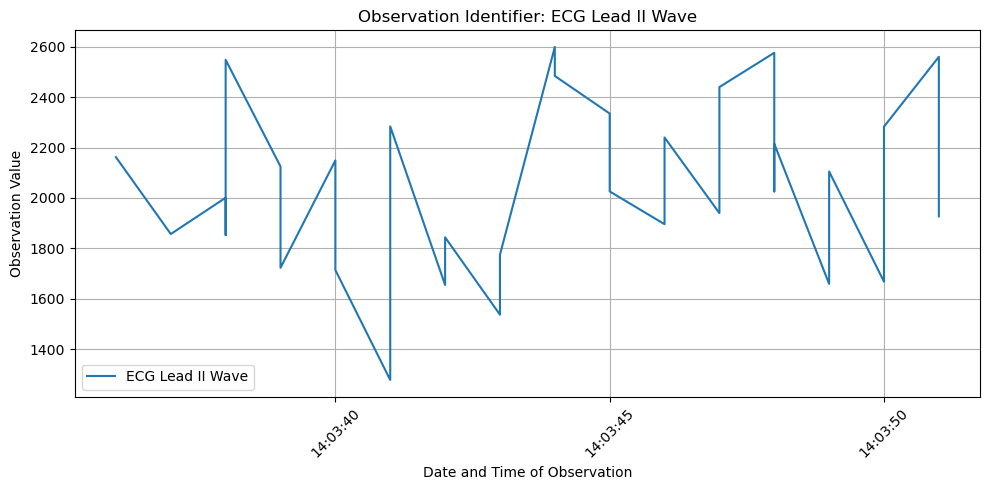

No data found for Observation Identifier: Arterial Blood Pressure (ART) Wave


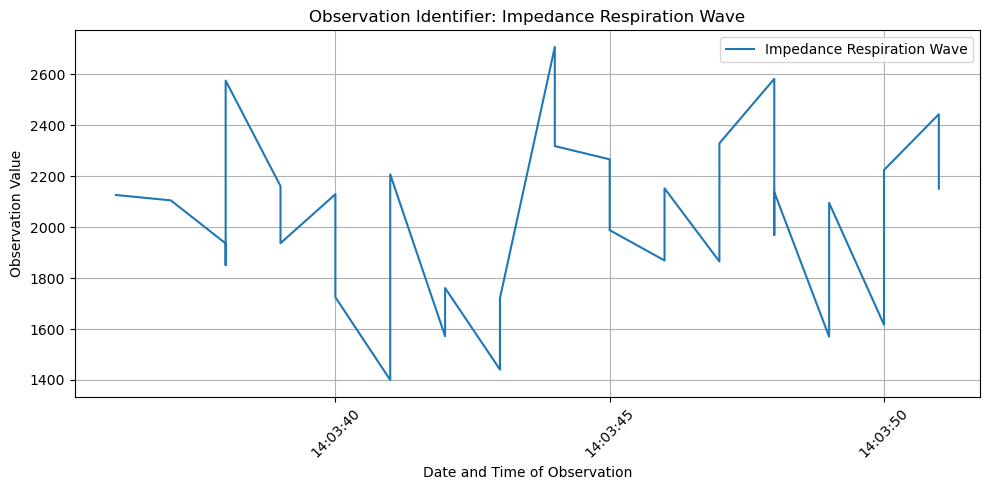

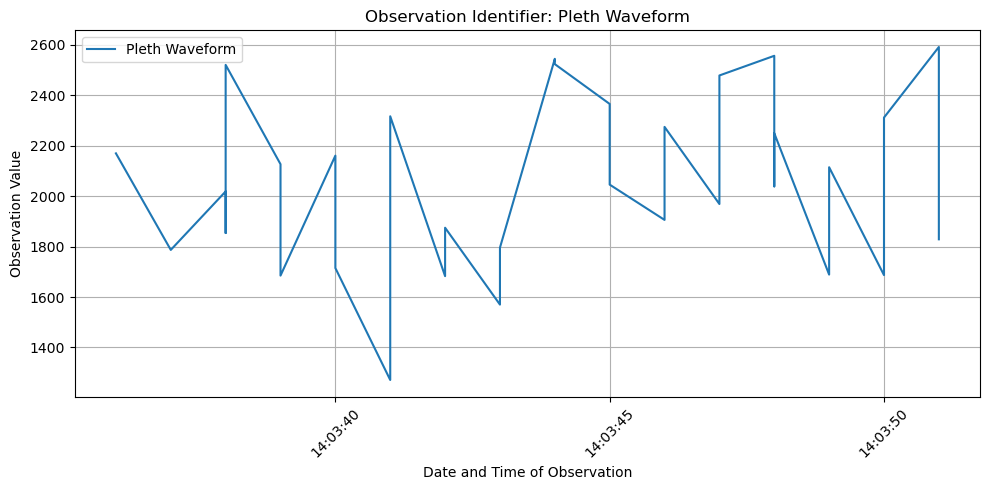

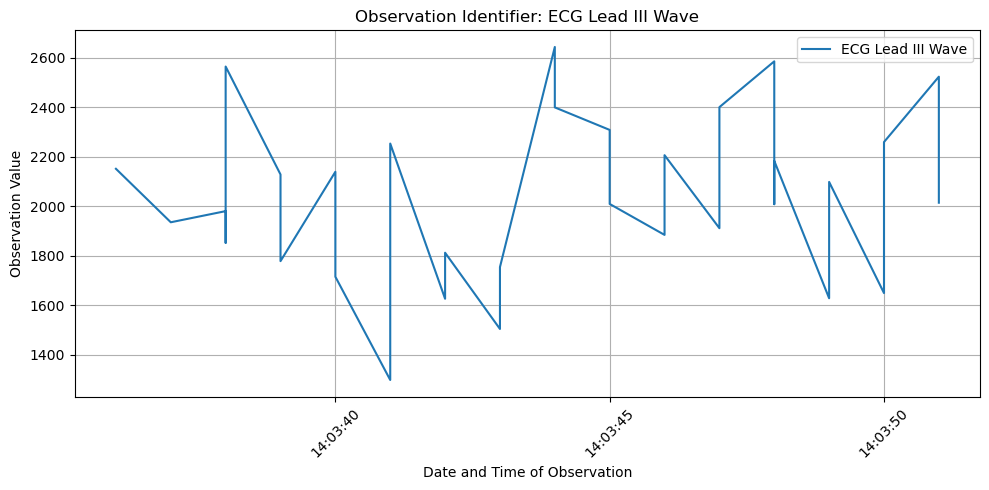

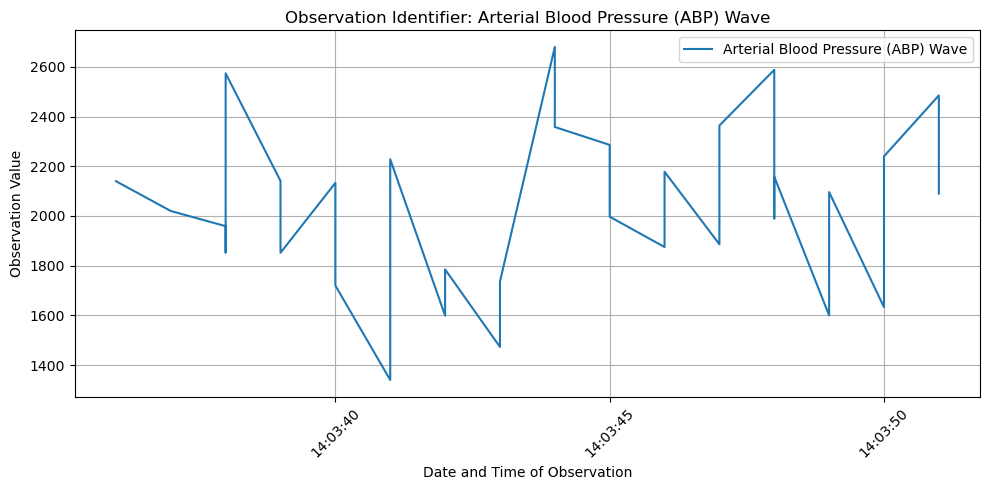

In [41]:

# Charger votre DataFrame
file_path = r"C:\Users\AdminPC\sepsis_prediction\sepsis_prediction\exploration du sujet\variables\recent\variables\df_lits\LIT2_filtered_reduit.xlsx"
df = pd.read_excel(file_path)


# Définir les variables à dessiner le graphe
observations_dict = {'5141': 'ECG Lead II Wave', '8858': 'Arterial Blood Pressure (ART) Wave', '8870': 'Impedance Respiration Wave', '113': 'Pleth Waveform', '5142': 'ECG Lead III Wave', '8857': 'Arterial Blood Pressure (ABP) Wave'}

# Fonction pour aplatir les listes et créer un nouveau DataFrame
def flatten_dataframe(df):
    records = []
    for idx, row in df.iterrows():
        date = pd.to_datetime(row['MSH_DATE_TIME_OF_MESSAGE'], format='%Y%m%d%H%M%S')
        observation_identifiers = row['OBX_OBSERVATION_IDENTIFIER'].split('|')
        observation_values = row['OBX_OBSERVATION_VALUE'].split('^')
        
        for obs_id, value in zip(observation_identifiers, observation_values):
            records.append({
                'MSH_DATE_TIME_OF_MESSAGE': date,
                'OBX_OBSERVATION_IDENTIFIER': obs_id,
                'OBX_OBSERVATION_VALUE': float(value)
            })
    return pd.DataFrame(records)

flattened_df = flatten_dataframe(df)

# Vérifier les données avant de tracer
print(flattened_df.head())

# Tracer les graphiques pour chaque identifiant d'observation
for obs_id, obs_label in observations_dict.items():
    obs_df = flattened_df[flattened_df['OBX_OBSERVATION_IDENTIFIER'] == obs_id]
    if not obs_df.empty:
        plt.figure(figsize=(10, 5))
        plt.plot(obs_df['MSH_DATE_TIME_OF_MESSAGE'], obs_df['OBX_OBSERVATION_VALUE'], label=obs_label)
        plt.title(f'Observation Identifier: {obs_label}')
        plt.xlabel('Date and Time of Observation')
        plt.ylabel('Observation Value')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.legend()
        plt.show()
    else:
        print(f"No data found for Observation Identifier: {obs_label}")